In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
"""
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
"""
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nimport os\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [3]:
import os
import shutil

# Define directories
benign_dir = "/kaggle/input/final-cbis-ddsm-breast-cancer-image-dataset/Benign"
malignant_dir = "/kaggle/input/final-cbis-ddsm-breast-cancer-image-dataset/Malignant"
output_dir = "/kaggle/working/strategy1_dataset"  # Directory to save strategy1 files

# Ensure output directory exists
os.makedirs(output_dir, exist_ok=True)

# Function to save strategy1 files from a directory
def save_strategy1_files(source_dir, target_dir):
    count = 0
    for file in os.listdir(source_dir):
        if file.endswith(".npy") and "strategy1" in file:  # Check for strategy1 files
            source_path = os.path.join(source_dir, file)
            target_path = os.path.join(target_dir, file)
            shutil.copy(source_path, target_path)  # Copy file to target directory
            count += 1
    return count

# Main execution
if __name__ == "__main__":
    print("Saving strategy1 files...")

    # Process Benign directory
    benign_count = save_strategy1_files(benign_dir, output_dir)
    print(f"Saved {benign_count} strategy1 files from Benign directory.")

    # Process Malignant directory
    malignant_count = save_strategy1_files(malignant_dir, output_dir)
    print(f"Saved {malignant_count} strategy1 files from Malignant directory.")

    print(f"\nTotal strategy1 files saved: {benign_count + malignant_count}")
    print(f"Files are saved in: {output_dir}")



Saving strategy1 files...
Saved 2676 strategy1 files from Benign directory.
Saved 2308 strategy1 files from Malignant directory.

Total strategy1 files saved: 4984
Files are saved in: /kaggle/working/strategy1_dataset


In [4]:
import os
import shutil

# Define directories
benign_dir = "/kaggle/input/final-cbis-ddsm-breast-cancer-image-dataset/Benign"
malignant_dir = "/kaggle/input/final-cbis-ddsm-breast-cancer-image-dataset/Malignant"
output_dir = "/kaggle/working/strategy1_dataset"

# Subdirectories for benign and malignant
output_benign = os.path.join(output_dir, "benign")
output_malignant = os.path.join(output_dir, "malignant")

# Function to clean output directories
def clean_directory(directory):
    if os.path.exists(directory):
        shutil.rmtree(directory)
    os.makedirs(directory)

# Function to copy and rename files with labels
def save_and_label_files(source_dir, target_dir, label):
    count = 0
    for file in os.listdir(source_dir):
        if file.endswith(".npy") and "strategy1" in file:
            source_path = os.path.join(source_dir, file)
            # Modify filename to include label
            base_name = "_".join(file.split("_")[:3])  # Keeps augmented_strategy1_3548
            new_file = f"{base_name}_{label}.npy"     # Add label _0_ or _1_
            target_path = os.path.join(target_dir, new_file)
            shutil.copy(source_path, target_path)
            count += 1
    return count

# Main execution
if __name__ == "__main__":
    print("Cleaning output directories...")
    clean_directory(output_dir)
    clean_directory(output_benign)
    clean_directory(output_malignant)
    
    print("Saving and labeling strategy1 files...")

    # Process Benign directory with _0_ label
    benign_count = save_and_label_files(benign_dir, output_benign, "0")
    print(f"Saved and labeled {benign_count} strategy1 files from Benign directory.")

    # Process Malignant directory with _1_ label
    malignant_count = save_and_label_files(malignant_dir, output_malignant, "1")
    print(f"Saved and labeled {malignant_count} strategy1 files from Malignant directory.")

    print("\nSummary:")
    print(f"Benign files saved: {benign_count}")
    print(f"Malignant files saved: {malignant_count}")
    print(f"Files are saved in: {output_dir}")


Cleaning output directories...
Saving and labeling strategy1 files...
Saved and labeled 2676 strategy1 files from Benign directory.
Saved and labeled 2308 strategy1 files from Malignant directory.

Summary:
Benign files saved: 2676
Malignant files saved: 2308
Files are saved in: /kaggle/working/strategy1_dataset


In [9]:
import os
import numpy as np
from concurrent.futures import ThreadPoolExecutor

# 2. Define Directories
benign_dir = "/kaggle/input/final-cbis-ddsm-breast-cancer-image-dataset/Benign"
malignant_dir = "/kaggle/input/final-cbis-ddsm-breast-cancer-image-dataset/Malignant"

# 3. Compute Dataset-Specific Mean and Std (Parallelized)
def process_file(file_path):
    image = np.load(file_path).astype(np.float32) / 255.0
    return np.sum(image, axis=(0, 1)), np.sum(image ** 2, axis=(0, 1)), image.shape[0] * image.shape[1]

def compute_mean_std(data_dirs):
    sum_images = 0.0
    sum_squared_images = 0.0
    num_pixels = 0
    file_paths = []

    for data_dir in data_dirs:
        file_paths += [os.path.join(data_dir, file) for file in os.listdir(data_dir) if file.endswith('.npy')]

    with ThreadPoolExecutor() as executor:
        results = list(executor.map(process_file, file_paths))

    for s, s2, pixels in results:
        sum_images += s
        sum_squared_images += s2
        num_pixels += pixels

    mean = sum_images / num_pixels
    std = np.sqrt((sum_squared_images / num_pixels) - mean ** 2)
    return mean, std

mean, std = compute_mean_std([benign_dir, malignant_dir])
print(f"Computed Mean: {mean}, Std: {std}")

Computed Mean: [0.00237972 0.0023751  0.00174674], Std: [0.00088792 0.00102896 0.00067923]


In [8]:
from torch.utils.data import DataLoader, Dataset

class Custom3ChannelDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.files = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.files)

    def __getitem__(self, idx):
        image = np.load(self.files[idx])

        if image.ndim == 2:
            image = np.stack([image] * 3, axis=0) 
        elif image.shape[0] != 3:
            image = image[:3, :, :] 
        
        image = torch.tensor(image, dtype=torch.float32)
        if self.transform:
            image = self.transform(image)

        label = torch.tensor(self.labels[idx], dtype=torch.float32)
        return image, label


In [10]:
from torchvision import transforms, models

# Data Transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Ensure all images are resized to 224x224
    transforms.Normalize(mean=[0.00237972, 0.0023751,  0.00174674],
                         std=[0.00088792, 0.00102896, 0.00067923])
])


In [34]:
# Paths
benign_dir = "/kaggle/working/strategy1_dataset/benign"
malignant_dir = "/kaggle/working/strategy1_dataset/malignant"

# Collect all file paths
benign_files = [os.path.join(benign_dir, f) for f in os.listdir(benign_dir) if f.endswith('.npy')]
malignant_files = [os.path.join(malignant_dir, f) for f in os.listdir(malignant_dir) if f.endswith('.npy')]

# Split into Train and Test
from sklearn.model_selection import train_test_split
benign_train, benign_test = train_test_split(benign_files, test_size=0.2, random_state=42)
malignant_train, malignant_test = train_test_split(malignant_files, test_size=0.2, random_state=42)

# Combine Files and Labels
train_files = benign_train + malignant_train
train_labels = [0] * len(benign_train) + [1] * len(malignant_train)

test_files = benign_test + malignant_test
test_labels = [0] * len(benign_test) + [1] * len(malignant_test)

train_dataset = Custom3ChannelDataset(train_files, train_labels, transform=transform)
val_dataset = Custom3ChannelDataset(test_files, test_labels, transform=transform)

benign_count = len(benign_train)
malignant_count = len(malignant_train)

# Calculate sample weights
weights = [
    1.0 / benign_count if label == 0 else 1.1593 / malignant_count
    for label in train_labels
]

# Define WeightedRandomSampler
train_sampler = WeightedRandomSampler(weights, num_samples=len(train_dataset), replacement=True)

# Training DataLoader with WeightedRandomSampler
train_loader = DataLoader(
    train_dataset,
    batch_size=32,
    sampler=train_sampler
)

# Validation DataLoader (No Sampling)
val_loader = DataLoader(
    val_dataset,
    batch_size=32,
    shuffle=False
)

# Combine into DataLoader Dictionary
dataloaders = {
    'train': train_loader,
    'val': val_loader
}

In [35]:
def plot_metrics(train_losses, val_losses, val_accuracies, val_roc_aucs):
    epochs = range(1, len(train_losses) + 1)
    
    plt.figure(figsize=(14, 10))
    
    # 📉 Loss Plot
    plt.subplot(2, 1, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid()
    
    # 📈 Accuracy and AUC Plot
    plt.subplot(2, 1, 2)
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.plot(epochs, val_roc_aucs, label='Validation AUC')
    plt.xlabel('Epochs')
    plt.ylabel('Metrics')
    plt.title('Validation Accuracy and AUC')
    plt.legend()
    plt.grid()
    
    plt.tight_layout()
    plt.show()


# 📚 **CustomCNN Architecture: Explanation**

The `CustomCNN` architecture is a deep convolutional neural network tailored for **binary image classification tasks**, specifically optimized for scenarios involving **medical imaging datasets** (e.g., benign vs malignant tumor classification). Below is a detailed explanation of each component, the techniques employed, and the reasoning behind their inclusion.

---

## 🚀 **1. Activation Function: Swish (SiLU)**

### **What is Swish?**
The **Swish Activation Function** is defined as:

$f(x) = x \cdot \text{sigmoid}(x)$

### **Why Use Swish?**
- **Smooth Gradient Flow:** Prevents vanishing gradients, ensuring stable training even in deep networks.
- **Improved Accuracy:** Empirically shown to outperform ReLU in deep architectures.
- **Non-Monotonicity:** Allows better representation learning.

---

## 🧠 **2. Attention Mechanism: SEBlock (Squeeze-and-Excitation Block)**

### **What is SEBlock?**
The **Squeeze-and-Excitation (SE)** block recalibrates feature maps through:
1. **Squeeze:** Global average pooling reduces spatial dimensions.
2. **Excitation:** Fully connected layers model channel-wise interdependencies.
3. **Recalibration:** Sigmoid activation generates attention weights for each channel.

### **Why Use SEBlock?**
- **Channel Attention:** Enhances the most informative features.
- **Improved Generalization:** Focuses on important channels for each input.
- **Works Well with Limited Data:** Effective in extracting meaningful patterns even from smaller datasets.

---

## ⚙️ **3. Residual Blocks**

### **What is a Residual Block?**
- Introduces **skip connections** to bypass layers.
- Alleviates the **vanishing gradient problem** by allowing gradients to flow through shortcut paths.

### **Why Use Residual Blocks?**
- **Deeper Networks:** Enables the construction of very deep architectures without performance degradation.
- **Gradient Stability:** Prevents the vanishing gradient issue.
- **Efficient Learning:** Learns residual mappings instead of full transformations.

---

## 🏗️ **4. Hierarchical Layer Structure**

### **Architecture Design:**
1. **Initial Convolution Block:** Captures low-level features like edges and corners.
2. **Residual Layers (4 Blocks):**
    - Extract progressively higher-level features.
    - Increase channels at each layer for richer representations.
3. **Global Average Pooling (GAP):** Reduces spatial dimensions to a single vector per channel.

### **Why This Design?**
- **Feature Hierarchy:** Builds representations from simple to complex patterns.

---

## 🛠️ **5. Fully Connected Layers with Batch Normalization and Dropout**

### **Key Components:**
1. **Batch Normalization:** Stabilizes input distributions to fully connected layers.
2. **Dropout:** Randomly drops neurons during training to prevent overfitting.
3. **Dense Layers:** Three dense layers progressively refine the final classification decision.

### **Why These Choices?**
- **Batch Normalization:** Normalizes activations, speeding up convergence.
- **Dropout:** Reduces overfitting by preventing co-adaptation of neurons.
- **Progressive Refinement:** The final layers progressively refine features into binary class probabilities.

---

## 📊 **6. Output Layer**

### **Binary Classification:**
- The final layer outputs a **single raw logit**.
- Uses the **BCEWithLogitsLoss** loss function for stability and efficiency.

### **Why BCEWithLogitsLoss?**
- Combines the sigmoid activation function with binary cross-entropy loss.
- More numerically stable compared to applying sigmoid separately.

---

## 🏆 **Conclusion**

This architecture integrates various tecniques to address the unique challenges of **binary image classification tasks**. Its design emphasizes:
- **Robust feature extraction**
- **Efficient training for limited datasets**
- **Mitigation of class imbalance issues**


In [36]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Activation Function: Swish
class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

# Attention Block: SEBlock (Squeeze-and-Excitation Block)
class SEBlock(nn.Module):
    def __init__(self, channels, reduction=16):
        """
        Initializes an SEBlock for channel-wise attention.
        Highlights important channels while suppressing less useful ones
        """
        super(SEBlock, self).__init__()
        # Fully connected layers for channel attention
        self.fc1 = nn.Linear(channels, channels // reduction)  # Reduce dimensionality
        self.fc2 = nn.Linear(channels // reduction, channels)  # Restore original dimensions

    
    def forward(self, x):
        """
        Forward pass of the SEBlock.
        """
        batch, channels, _, _ = x.size()  # Extract batch and channel dimensions
        
        # Global Average Pooling: Reduce spatial dimensions to 1x1
        y = F.adaptive_avg_pool2d(x, 1).view(batch, channels)
        
        # Fully connected layers with activation: Adjust the weights of each channel based on GAP values
        y = F.silu(self.fc1(y))  # Swish Activation to reduce channel
        y = torch.sigmoid(self.fc2(y))  # Restore channels and normalize to [0,1]
        
        # Reshape to match original channel dimensions
        y = y.view(batch, channels, 1, 1)
        
        # Scale input by attention weights
        return x * y

# Residual Block with SE Attention
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels):
        """
        Initializes a Residual Block with SE attention.
        Allows training deep networks by addressing vanishing gradient issues.
        """
        super(ResidualBlock, self).__init__()
        
        # First Convolutional Layer
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(out_channels)  # Batch normalization after first conv
        
        # Second Convolutional Layer
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(out_channels)  # Batch normalization after second conv
        
        # Squeeze-and-Excitation Block
        self.se = SEBlock(out_channels) # Adds channel-wise attention to focus on important features.
        
        # Skip Connection (Shortcut): Directly adds the input (skip) to the output of convolutional layers.
        self.skip = nn.Conv2d(in_channels, out_channels, kernel_size=1) if in_channels != out_channels else nn.Identity()
        self.bn_skip = nn.BatchNorm2d(out_channels)
    
    def forward(self, x):
        """
        Forward pass of ResidualBlock.
        """
        # Shortcut connection
        skip = self.bn_skip(self.skip(x))
        x = F.silu(self.bn1(self.conv1(x))) # First Conv + BN + Swish Activation
        x = self.bn2(self.conv2(x)) # Second Conv + BN
        x = self.se(x)  # Channel Attention
        return F.silu(x + skip)  # Swish Activation and Add Skip Connection

class CustomCNN(nn.Module):
    def __init__(self):
        """
        Initializes CustomCNN with multiple residual and attention layers.
        """
        super(BigCustomCNN, self).__init__()
        
        # Initial Convolution Block: Capture basic features
        self.initial_conv = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3)
        self.initial_bn = nn.BatchNorm2d(64)
        self.initial_pool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        # Residual Layers: Process and etract hierarchical features
        self.layer1 = self._make_layer(64, 128, 3)  # 3 Residual Blocks
        self.layer2 = self._make_layer(128, 256, 4)  # 4 Residual Blocks
        self.layer3 = self._make_layer(256, 512, 6)  # 6 Residual Blocks
        self.layer4 = self._make_layer(512, 1024, 3)  # 3 Residual Blocks
        
        # Global Average Pooling
        self.gap = nn.AdaptiveAvgPool2d(1)
        
        # Fully Connected Layers with Dropout and BatchNorm
        self.fc1 = nn.Linear(1024, 512)
        self.bn_fc1 = nn.BatchNorm1d(512)
        self.dropout1 = nn.Dropout(0.4)
        
        self.fc2 = nn.Linear(512, 256)
        self.bn_fc2 = nn.BatchNorm1d(256)
        self.dropout2 = nn.Dropout(0.4)
        
        self.fc3 = nn.Linear(256, 1)  # Binary Classification
    
    def _make_layer(self, in_channels, out_channels, num_blocks):
        """
        Creates a layer with multiple ResidualBlocks.
        """
        layers = [ResidualBlock(in_channels, out_channels)]
        for _ in range(1, num_blocks):
            layers.append(ResidualBlock(out_channels, out_channels))
        return nn.Sequential(*layers)

    def forward(self, x):
        """
        Forward pass of BigCustomCNN.
        
        Args:
            x (torch.Tensor): Input tensor.
        
        Returns:
            torch.Tensor: Output tensor (logits for BCEWithLogitsLoss).
        """
        # Initial Conv Block
        x = F.silu(self.initial_bn(self.initial_conv(x)))  # Swish Activation
        x = self.initial_pool(x)
        
        # Residual Layers
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        # Global Average Pooling
        x = self.gap(x).view(x.size(0), -1)
        
        # Fully Connected Layers + dropout
        x = F.silu(self.bn_fc1(self.fc1(x)))
        x = self.dropout1(x)
        
        x = F.silu(self.bn_fc2(self.fc2(x)))
        x = self.dropout2(x)
        return self.fc3(x)  # Raw logits for BCEWithLogitsLoss


# 📚 **Detailed Explanation of Key Concepts**

---

## 🧠 **1. BCEWithLogitsLoss**

### ✅ **Why "WithLogits"?**
- The model's output layer (`fc3`) does **not include a sigmoid activation function**.
- `BCEWithLogitsLoss` combines the **sigmoid activation function** and **binary cross-entropy loss** into a single operation.
- This combination improves **numerical stability** during training.

### 🔑 **Mathematical Formula:**

$
L = -\frac{1}{N} \sum_{i=1}^{N} \Big[ y_i \cdot \log(\sigma(\hat{y}_i)) + (1 - y_i) \cdot \log(1 - \sigma(\hat{y}_i)) \Big]
$

Where:  
- $ y_i $: True label (0 or 1).  
- $ \hat{y}_i $: Predicted raw logits from the model.  
- $ \sigma $: Sigmoid function.  

---

## ⚙️ **2. AdamW Optimizer**

### ✅ **What is AdamW?**
- A variant of the **Adam optimizer** designed to **decouple weight decay from gradient updates**.

### ✅ **Why AdamW instead of Adam?**
- **Adam:** Applies weight decay via **L2 regularization** which interacts with momentum, causing subtle issues.
- **AdamW:** Decouples **weight decay** and applies it directly to the **parameters**.

### 🔑 **Mathematical Formula:**

$
\theta_{t+1} = \theta_t - \eta \cdot \frac{m_t}{\sqrt{v_t} + \epsilon} - \lambda \cdot \theta_t
$

Where:  
- $ \theta $: Model parameters.  
- $ \eta $: Learning rate.  
- $ m_t $: First moment estimate (mean of gradients).  
- $ v_t $: Second moment estimate (variance of gradients).  
- $ \lambda $: Weight decay coefficient.  

### 💡 **Why This Matters?**
- **Weight Decay:** Helps prevent **overfitting** by penalizing large weights.  
- **Decoupling Weight Decay:** Improves **optimization stability** and ensures **better generalization**.  

---

## 📉 **3. CosineAnnealingLR Scheduler**

### ✅ **What is CosineAnnealingLR?**
- A **learning rate scheduler** that gradually reduces the learning rate following a **cosine curve**.

### ✅ **How It Works?**
- The learning rate starts at its **initial value**.
- Gradually decays to a **minimum value** over `T_max` epochs.
- After `T_max` epochs, the scheduler resets.

### 🔑 **Mathematical Formula:**

$
\eta_t = \eta_{min} + \frac{1}{2} (\eta_{max} - \eta_{min}) (1 + \cos(\frac{T_{cur}}{T_{max}} \pi))
$

Where:  
- $ \eta_t $: Learning rate at time $t$.  
- $ \eta_{min} $: Minimum learning rate.  
- $ \eta_{max} $: Initial learning rate.  
- $ T_{cur} $: Current epoch.  
- $ T_{max} $: Maximum number of epochs for decay.  

### 💡 **Why This Matters?**
- Prevents the learning rate from **becoming too small too early**.  
- Helps the model **escape local minima** during training.  
- Smoothly adjusts the learning rate, improving overall **training convergence**.

---

## ⚡ **4. GradScaler for Mixed Precision Training**

### ✅ **What is GradScaler?**
- Part of PyTorch's **Automatic Mixed Precision (AMP)** library.
- Scales gradients during **backpropagation** to prevent **underflow** or **overflow** when using **float16 precision**.

### ✅ **Why Use GradScaler?**
- **Mixed Precision Training:** Uses both `float32` and `float16` to reduce memory usage and improve computational speed.  
- Prevents **NaN gradients** caused by extremely small values in `float16`.

### 💡 **Why This Matters?**
- Reduces **GPU memory consumption**.
- Speeds up training without compromising **numerical stability**.


In [37]:
import torch.optim as optim
from torch.cuda.amp import GradScaler

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CustomCNN().to(device)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)
scheduler = optim.lr_scheduler.OneCycleLR(
    optimizer, max_lr=1e-3, epochs=15, steps_per_epoch=len(dataloaders['train'])
)
scaler = GradScaler() 

<ipython-input-37-6405b0423d9d>:11: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()


# 📚 **Training Pipeline Explanation**

### ⚖️ **Why Use Class Weights?**
- **Class Imbalance:** The dataset has an imbalance (fewer malignant cases compared to benign ones).
- **Positive Class Weight:** By applying a higher weight (`1.1593`) to the positive class (malignant samples), the model gives more importance to underrepresented samples during training.
- This adjustment helps prevent the model from being biased towards predicting the dominant class (benign).

---

### 💾 **Why Use Checkpoints?**
- **Continuity:** Training large models is time-consuming. Checkpoints allow resuming from the last saved state in case of interruptions.  
- **Best Model Preservation:** Ensures that the best-performing model can be retrieved based on validation loss.

#### **What Does the Checkpoint Save?**
- Model's weights and architecture state.
- Optimizer state, including learning rates and momentum.
- Scheduler state to ensure consistent learning rate adjustments.
- Mixed-precision gradient scaler state.
- Training and validation metrics history (loss, accuracy, ROC-AUC).
- Epoch number to resume training seamlessly.

---

### 📊 Metrics Tracked During Training**

1. **Training Loss:** Tracks how well the model is minimizing the error during training.
2. **Validation Loss:** Indicates how well the model generalizes to unseen data.
3. **Validation Accuracy:** Measures the percentage of correct predictions.
4. **Validation ROC-AUC:** Evaluates how well the model differentiates between positive and negative classes.

---

### 🛡️ Early Stopping Mechanism**

#### **Why Early Stopping?**
- Prevents overfitting by stopping training when validation loss stops improving.
- Saves computational resources and training time.

#### **How It Works:**
- Tracks the **validation loss** at each epoch.
- If the loss doesn’t improve for a certain number of consecutive epochs (defined by `patience`), training stops automatically.
- This ensures the model doesn't overfit while still capturing the optimal performance point.


# 🛡️ **Update on the training loop after first trial didn't went so well...**

### ⚠️ **1. "High Loss Detected"?**

#### 📝 **Purpose of High Loss Detection**
- **Early Identification of Anomalies:** During training, some batches may exhibit abnormally high loss values.  
- **Monitoring Model Stability:** Frequent spikes could suggest issues like:
   - Unstable learning rate.
   - Vanishing/exploding gradients.
   - Improper weight initialization.

  Note: For Next time a detection running on a certain windows of value instead of a Fixed value would be more interesting, anyway this was supposed to help to understand more the issue regarding the first part of training and it did its purpose correctly
---

## 📊 **2. Change of the number of Batches**

### 📦 **How to Calculate it**
- The **number of batches per epoch** is determined by:  
  
  $\text{Number of Batches} = \frac{\text{Dataset Size}}{\text{Batch Size}}$

### 🔄 **Changes**
1. **Batch Size Adjustment:** the batch size was **doubled** from its previous value, to:
   - Improve GPU utilization.
   - Reduce variance in gradient updates.


In [52]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import accuracy_score, roc_auc_score
from torch.cuda.amp import GradScaler, autocast
import os
import numpy as np
import matplotlib.pyplot as plt

# Ensure directory for checkpoints exists
os.makedirs('checkpoints', exist_ok=True)

# Adjusted BCEWithLogitsLoss with class imbalance handling
class_weights = torch.tensor([1.0, 1.1593]).to(device)
criterion = nn.BCEWithLogitsLoss(pos_weight=class_weights[1])  # Use weight for positive class

# Updated Training Function with Improvements
def train_model(model, dataloaders, criterion, optimizer, scheduler, scaler, num_epochs=15, checkpoint_path='checkpoints/model_checkpoint.pth', patience=3):
    train_losses = []
    val_losses = []
    val_accuracies = []
    val_roc_aucs = []
    
    best_val_loss = float('inf')  # Track the best validation loss for early stopping
    patience_counter = 0  # Counter for early stopping
    
    start_epoch = 0

    # Check if a checkpoint exists

    if os.path.exists(checkpoint_path):
        print("🔄 Resuming training from checkpoint...")
        checkpoint = torch.load(checkpoint_path)
        model.load_state_dict(checkpoint['model_state_dict'])
        optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
        scheduler.load_state_dict(checkpoint['scheduler_state_dict'])
        scaler.load_state_dict(checkpoint['scaler_state_dict'])
        start_epoch = checkpoint['epoch'] + 1
        print(f"✅ Resumed from epoch {start_epoch}")


    for epoch in range(start_epoch, num_epochs):
        print(f"\n🚀 **Epoch {epoch+1}/{num_epochs}**")
        model.train()
        running_loss = 0.0
        all_preds = []
        all_labels = []
        
        # Training Phase
        for batch_idx, (inputs, labels) in enumerate(dataloaders['train']):
            inputs = inputs.to(device)
            labels = labels.unsqueeze(1).float().to(device)
            
            optimizer.zero_grad()
            
            with torch.amp.autocast('cuda'):
                outputs = model(inputs)
                loss = criterion(outputs, labels)
            
            # Debugging high loss batches
            if loss.item() > 0.8:
                print(f"⚠️ High Loss Detected! Batch: {batch_idx+1} | Loss: {loss.item():.4f}")
            
            scaler.scale(loss).backward()
            scaler.step(optimizer)
            scaler.update()
            
            running_loss += loss.item()
            preds = torch.sigmoid(outputs).cpu().detach().numpy()
            all_preds.extend(preds)
            all_labels.extend(labels.cpu().detach().numpy())
            
            # Debugging info every 10 batches
            if (batch_idx + 1) % 10 == 0:
                print(f"🔹 Batch {batch_idx+1}/{len(dataloaders['train'])} | Batch Loss: {loss.item():.4f}")
        
        scheduler.step()
        
        avg_train_loss = running_loss / len(dataloaders['train'])
        train_losses.append(avg_train_loss)
        
        # Validation Phase
        model.eval()
        val_running_loss = 0.0
        val_preds = []
        val_labels = []
        
        with torch.no_grad():
            for inputs, labels in dataloaders['val']:
                inputs = inputs.to(device)
                labels = labels.unsqueeze(1).float().to(device)
                
                with torch.amp.autocast('cuda'):
                    outputs = model(inputs)
                    loss = criterion(outputs, labels)
                
                val_running_loss += loss.item()
                preds = torch.sigmoid(outputs).cpu().detach().numpy()
                val_preds.extend(preds)
                val_labels.extend(labels.cpu().detach().numpy())
        
        avg_val_loss = val_running_loss / len(dataloaders['val'])
        val_losses.append(avg_val_loss)
        
        val_accuracy = accuracy_score((np.array(val_labels) > 0.5).astype(int), (np.array(val_preds) > 0.5).astype(int))
        val_roc_auc = roc_auc_score(val_labels, val_preds)
        
        val_accuracies.append(val_accuracy)
        val_roc_aucs.append(val_roc_auc)
        
        print(f"✅ Epoch {epoch+1} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | Val Acc: {val_accuracy:.4f} | Val AUC: {val_roc_auc:.4f}")
        
        # Save checkpoint every epoch
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'scheduler_state_dict': scheduler.state_dict(),
            'scaler_state_dict': scaler.state_dict(),
            'train_losses': train_losses,
            'val_losses': val_losses,
            'val_accuracies': val_accuracies,
            'val_roc_aucs': val_roc_aucs
        }, checkpoint_path)
        
        print("💾 Checkpoint saved successfully.")
        
        # Early Stopping Logic
        if avg_val_loss < best_val_loss:
            best_val_loss = avg_val_loss
            patience_counter = 0  # Reset patience if loss improves
        else:
            patience_counter += 1
        
        if patience_counter >= patience:
            print("⏹️ Early Stopping Triggered! No improvement for consecutive epochs.")
            break
    
    print("\n🎯 **Training Complete!**")
    return train_losses, val_losses, val_accuracies, val_roc_aucs


In [39]:
train_model(model, dataloaders, criterion, optimizer, scheduler, scaler, num_epochs=15)


🚀 **Epoch 1/15**
⚠️ High Loss Detected! Batch: 5 | Loss: 0.8681
⚠️ High Loss Detected! Batch: 6 | Loss: 0.8036
⚠️ High Loss Detected! Batch: 9 | Loss: 0.8408
🔹 Batch 10/125 | Batch Loss: 0.6898
⚠️ High Loss Detected! Batch: 11 | Loss: 0.8869
⚠️ High Loss Detected! Batch: 12 | Loss: 0.9295
⚠️ High Loss Detected! Batch: 17 | Loss: 0.8024
🔹 Batch 20/125 | Batch Loss: 0.6980
⚠️ High Loss Detected! Batch: 23 | Loss: 0.8623
⚠️ High Loss Detected! Batch: 24 | Loss: 0.8816
🔹 Batch 30/125 | Batch Loss: 0.7620
⚠️ High Loss Detected! Batch: 35 | Loss: 0.8506
⚠️ High Loss Detected! Batch: 36 | Loss: 0.8269
🔹 Batch 40/125 | Batch Loss: 0.7973
🔹 Batch 50/125 | Batch Loss: 0.7095
⚠️ High Loss Detected! Batch: 59 | Loss: 0.8480
🔹 Batch 60/125 | Batch Loss: 0.7237
⚠️ High Loss Detected! Batch: 61 | Loss: 0.8006
🔹 Batch 70/125 | Batch Loss: 0.6541
🔹 Batch 80/125 | Batch Loss: 0.7270
🔹 Batch 90/125 | Batch Loss: 0.7219
🔹 Batch 100/125 | Batch Loss: 0.7711
⚠️ High Loss Detected! Batch: 106 | Loss: 0.8856

([0.7301776595115662,
  0.7027377600669861,
  0.6625996065139771,
  0.6688999457359314,
  0.6098043353557586,
  0.5467467203140258,
  0.49810995149612425,
  0.4407735576629639,
  0.35822496020793915,
  0.3306128957271576,
  0.30065048575401304,
  0.2675102810263634,
  0.21824768048524856,
  0.21651634520292282,
  0.1871027781367302],
 [0.7300867512822151,
  0.7014075312763453,
  0.704072380438447,
  0.6856853403151035,
  0.6438924763351679,
  0.6438890406861901,
  0.5508301788941026,
  0.5851702722720802,
  0.4279315178282559,
  0.4362221425399184,
  0.3978644001763314,
  0.32368984818458557,
  0.31971829012036324,
  0.29614538815803826,
  0.26488860126119107],
 [0.5581162324649298,
  0.594188376753507,
  0.5831663326653307,
  0.6032064128256514,
  0.6933867735470942,
  0.6723446893787575,
  0.7344689378757515,
  0.7705410821643287,
  0.7995991983967936,
  0.8056112224448898,
  0.8276553106212425,
  0.8527054108216433,
  0.8857715430861723,
  0.8817635270541082,
  0.8967935871743486],


15 epochs took more or less 2 hours leveraging on Kaggle T4 GPU

I forgot to plot inside the training function and to save value into a global variable so I have to rewrite it manually :(

I wanted to use TensorBoard cause for Deep Learning is efficient since it allow u to check the progress of the training while it's still running but I don't know if it's compatible with Kaggle, anyway Debug gave us similar info. Anyway we are gonna plot the info now

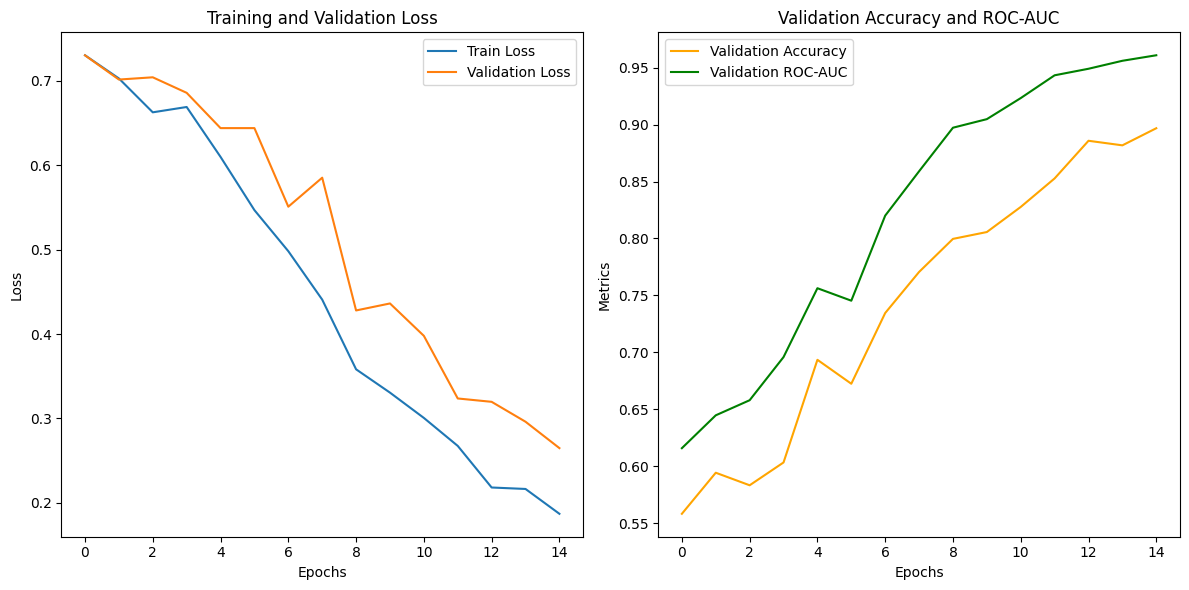

In [43]:

train_losses = [0.7301776595115662, 0.7027377600669861, 0.6625996065139771, 0.6688999457359314, 0.6098043353557586,
                0.5467467203140258, 0.49810995149612425, 0.4407735576629639, 0.35822496020793915, 0.3306128957271576,
                0.30065048575401304, 0.2675102810263634, 0.21824768048524856, 0.21651634520292282, 0.1871027781367302]

val_losses = [0.7300867512822151, 0.7014075312763453, 0.704072380438447, 0.6856853403151035, 0.6438924763351679,
              0.6438890406861901, 0.5508301788941026, 0.5851702722720802, 0.4279315178282559, 0.4362221425399184,
              0.3978644001763314, 0.32368984818458557, 0.31971829012036324, 0.29614538815803826, 0.26488860126119107]

val_accuracies = [0.5581162324649298, 0.594188376753507, 0.5831663326653307, 0.6032064128256514, 0.6933867735470942,
                  0.6723446893787575, 0.7344689378757515, 0.7705410821643287, 0.7995991983967936, 0.8056112224448898,
                  0.8276553106212425, 0.8527054108216433, 0.8857715430861723, 0.8817635270541082, 0.8967935871743486]

val_roc_aucs = [0.615744330296569, 0.6446198391161078, 0.657879433998837, 0.6957683175033922, 0.7562592879757059,
                0.7453035148930671, 0.8200192220714609, 0.8589742036570395, 0.8972487400659043, 0.904776038637979,
                0.9232732441687665, 0.9432888318149513, 0.9490332428765266, 0.9560396071590102, 0.9608895457776054]

# Plot
plt.figure(figsize=(12, 6))

# Training and Validation Losses
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Validation Accuracy and ROC-AUC Together
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.plot(val_roc_aucs, label='Validation ROC-AUC', color='green')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Validation Accuracy and ROC-AUC')
plt.legend()

plt.tight_layout()
plt.show()


More Training is needed! Let's see how our model is behaving until now

✅ Final Validation Loss: 0.2652
✅ Accuracy: 0.8978
✅ ROC-AUC: 0.9608

📊 Classification Report:
              precision    recall  f1-score   support

      Benign       0.91      0.90      0.90       536
   Malignant       0.88      0.90      0.89       462

    accuracy                           0.90       998
   macro avg       0.90      0.90      0.90       998
weighted avg       0.90      0.90      0.90       998



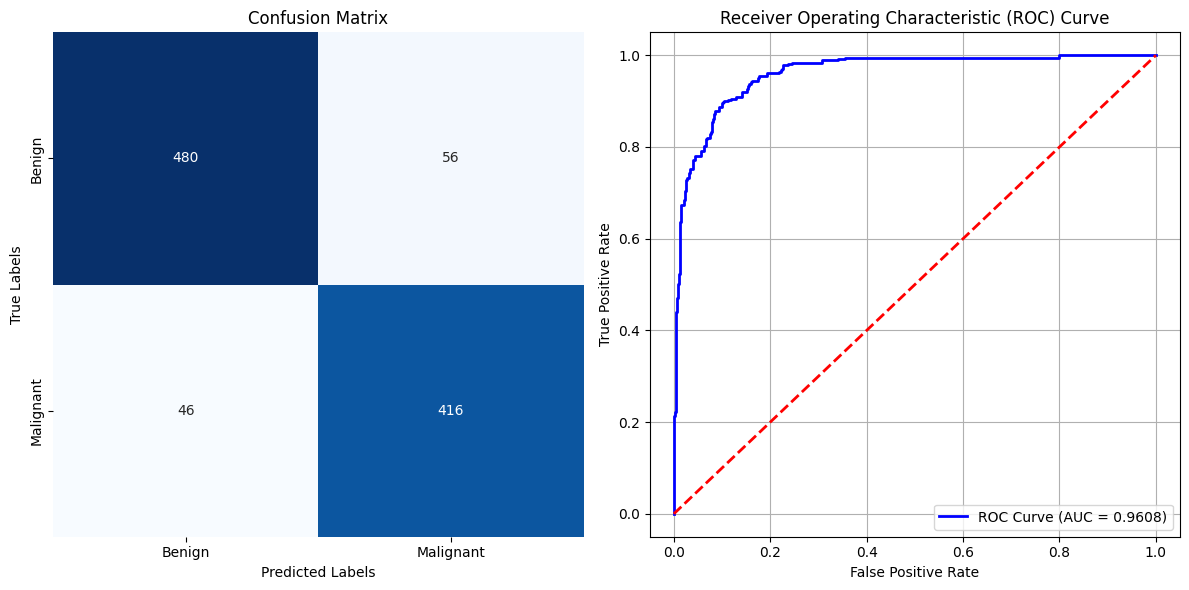

In [45]:
import seaborn as sns
from sklearn.metrics import (
    roc_auc_score, accuracy_score, confusion_matrix, classification_report, roc_curve, auc
)

def evaluate_model(model, dataloader, criterion, device):
    model.eval()
    all_labels = []
    all_outputs = []
    all_losses = []
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.unsqueeze(1).float().to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            all_losses.append(loss.item())
            
            outputs = torch.sigmoid(outputs).cpu().numpy()
            labels = labels.cpu().numpy()
            
            all_outputs.extend(outputs)
            all_labels.extend(labels)
    
    all_outputs = np.array(all_outputs).flatten()
    all_labels = np.array(all_labels).flatten()
    predictions = (all_outputs > 0.5).astype(int)
    
    # Metrics Calculation
    final_loss = np.mean(all_losses)
    accuracy = accuracy_score(all_labels, predictions)
    roc_auc = roc_auc_score(all_labels, all_outputs)
    conf_matrix = confusion_matrix(all_labels, predictions)
    report = classification_report(all_labels, predictions, target_names=["Benign", "Malignant"])
    
    print(f"✅ Final Validation Loss: {final_loss:.4f}")
    print(f"✅ Accuracy: {accuracy:.4f}")
    print(f"✅ ROC-AUC: {roc_auc:.4f}")
    print("\n📊 Classification Report:")
    print(report)
    

    # 1. Confusion Matrix Plot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, 
                xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title("Confusion Matrix")
    
    # 2. ROC Curve Plot
    fpr, tpr, _ = roc_curve(all_labels, all_outputs)
    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f"ROC Curve (AUC = {roc_auc:.4f})")
    plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (ROC) Curve")
    plt.legend(loc="lower right")
    plt.grid()
    
    plt.tight_layout()
    plt.show()
    
    return {
        "final_loss": final_loss,
        "accuracy": accuracy,
        "roc_auc": roc_auc,
        "confusion_matrix": conf_matrix,
        "classification_report": report
    }

final_metrics = evaluate_model(model, dataloaders['val'], criterion, device)

In [53]:
checkpoint_path = 'checkpoints/model_checkpoint.pth'
checkpoint = torch.load(checkpoint_path, map_location='cpu', weights_only=False)
print("✅ Full checkpoint loaded successfully.")
print(f"🔄 Last Epoch: {checkpoint.get('epoch', 'Unknown')}")


✅ Full checkpoint loaded successfully.
🔄 Last Epoch: 14


In [61]:
from kaggle_secrets import UserSecretsClient
import shutil

# Move the checkpoint to the root directory for easy download since Kaggle was buggy
shutil.copy('checkpoints/model_checkpoint.pth', 'model_checkpoint.pth')

from IPython.display import FileLink
FileLink('model_checkpoint.pth')


/kaggle/working/model_checkpoint.pth

In [71]:
import cupy as cp

def check_memory():
    memory_pool = cp.get_default_memory_pool()
    total_memory = cp.cuda.Device(0).mem_info[0]  # Total memory available
    used_memory = memory_pool.used_bytes()       # Memory allocated by the pool
    free_memory = total_memory - used_memory
    print(f"GPU Memory - Total: {total_memory / (1024**3):.2f} GB, Used: {used_memory / (1024**3):.2f} GB, Free: {free_memory / (1024**3):.2f} GB")

check_memory()
# Gpu memory was 0, after clearing it I waas able to restart training the model

GPU Memory - Total: 9.20 GB, Used: 0.00 GB, Free: 9.20 GB


In [70]:
import torch

torch.cuda.empty_cache()
torch.cuda.reset_peak_memory_stats()
print("✅ GPU Cache Cleared and Memory Stats Reset")


✅ GPU Cache Cleared and Memory Stats Reset


In [72]:
additional_epochs = 10 
train_model(
    model=model,
    dataloaders=dataloaders,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    scaler=scaler,
    num_epochs=15 + additional_epochs,
    checkpoint_path='checkpoints/model_checkpoint.pth',
    patience=5
)


🔄 Resuming training from checkpoint...


<ipython-input-52-a3c1a4472080>:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


✅ Resumed from epoch 15

🚀 **Epoch 16/25**
🔹 Batch 10/125 | Batch Loss: 0.1316
🔹 Batch 20/125 | Batch Loss: 0.1432
🔹 Batch 30/125 | Batch Loss: 0.1774
🔹 Batch 40/125 | Batch Loss: 0.3186
🔹 Batch 50/125 | Batch Loss: 0.2739
🔹 Batch 60/125 | Batch Loss: 0.2203
🔹 Batch 70/125 | Batch Loss: 0.1105
🔹 Batch 80/125 | Batch Loss: 0.1697
🔹 Batch 90/125 | Batch Loss: 0.1444
🔹 Batch 100/125 | Batch Loss: 0.1691
🔹 Batch 110/125 | Batch Loss: 0.1212
🔹 Batch 120/125 | Batch Loss: 0.1189
✅ Epoch 16 | Train Loss: 0.1726 | Val Loss: 0.2763 | Val Acc: 0.8918 | Val AUC: 0.9606
💾 Checkpoint saved successfully.

🚀 **Epoch 17/25**
🔹 Batch 10/125 | Batch Loss: 0.2250
🔹 Batch 20/125 | Batch Loss: 0.2397
🔹 Batch 30/125 | Batch Loss: 0.1325
🔹 Batch 40/125 | Batch Loss: 0.0851
🔹 Batch 50/125 | Batch Loss: 0.1592
🔹 Batch 60/125 | Batch Loss: 0.0963
🔹 Batch 70/125 | Batch Loss: 0.1105
🔹 Batch 80/125 | Batch Loss: 0.0801
🔹 Batch 90/125 | Batch Loss: 0.0593
🔹 Batch 100/125 | Batch Loss: 0.1325
🔹 Batch 110/125 | Batc

([0.17257675701379777,
  0.15136520212888718,
  0.14766737949848174,
  0.12848786196112633,
  0.14644632798433305,
  0.1402138203084469,
  0.14336674554646014,
  0.1365202576816082,
  0.1274810621738434,
  0.10863014622032642],
 [0.27629336109384894,
  0.23453109513502568,
  0.26976947160437703,
  0.24895352078601718,
  0.24167562410002574,
  0.2276253168238327,
  0.29631847236305475,
  0.2542377868667245,
  0.2290735724964179,
  0.17491278215311468],
 [0.8917835671342685,
  0.9138276553106213,
  0.8977955911823647,
  0.9038076152304609,
  0.9158316633266533,
  0.908817635270541,
  0.87374749498998,
  0.9148296593186372,
  0.9338677354709419,
  0.9428857715430862],
 [0.9605786005039736,
  0.9703511662466887,
  0.9696868740712025,
  0.9768123667377399,
  0.9712617916908962,
  0.9741006816566518,
  0.9549735090779868,
  0.9673345932674291,
  0.9713607288234153,
  0.9836309523809524])

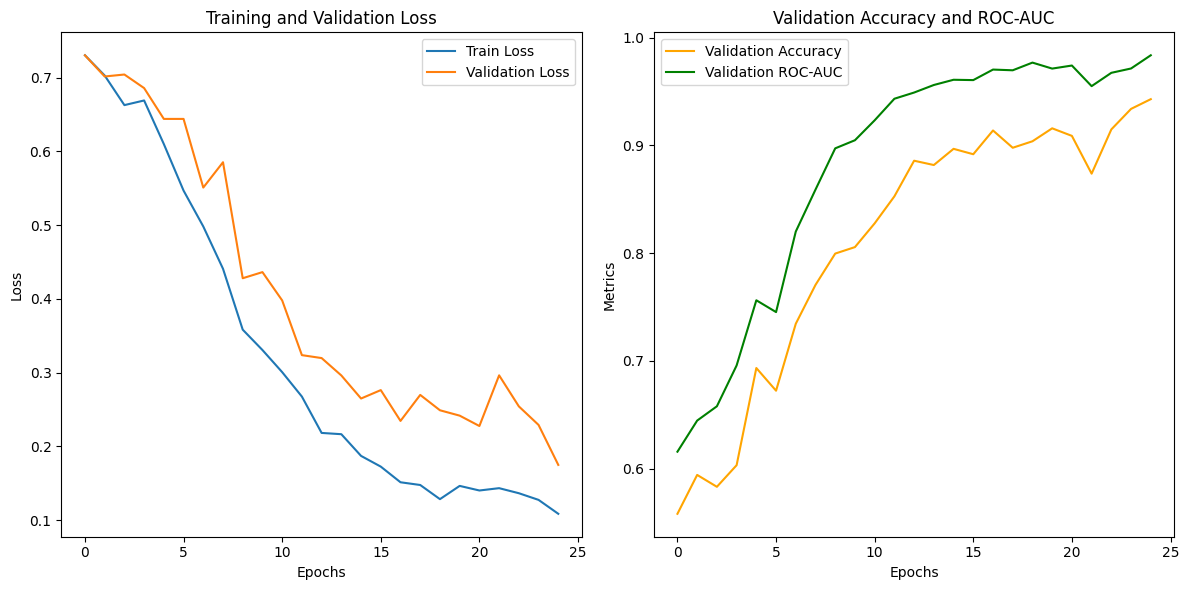

In [73]:
# Updated Training and Validation Metrics

# Training Losses
train_losses.extend([
    0.17257675701379777, 0.15136520212888718, 0.14766737949848174, 0.12848786196112633,
    0.14644632798433305, 0.1402138203084469, 0.14336674554646014, 0.1365202576816082,
    0.1274810621738434, 0.10863014622032642
])

# Validation Losses
val_losses.extend([
    0.27629336109384894, 0.23453109513502568, 0.26976947160437703, 0.24895352078601718,
    0.24167562410002574, 0.2276253168238327, 0.29631847236305475, 0.2542377868667245,
    0.2290735724964179, 0.17491278215311468
])

# Validation Accuracies
val_accuracies.extend([
    0.8917835671342685, 0.9138276553106213, 0.8977955911823647, 0.9038076152304609,
    0.9158316633266533, 0.908817635270541, 0.87374749498998, 0.9148296593186372,
    0.9338677354709419, 0.9428857715430862
])

# Validation ROC-AUCs
val_roc_aucs.extend([
    0.9605786005039736, 0.9703511662466887, 0.9696868740712025, 0.9768123667377399,
    0.9712617916908962, 0.9741006816566518, 0.9549735090779868, 0.9673345932674291,
    0.9713607288234153, 0.9836309523809524
])

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Training and Validation Losses
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Validation Accuracy and ROC-AUC Together
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.plot(val_roc_aucs, label='Validation ROC-AUC', color='green')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Validation Accuracy and ROC-AUC')
plt.legend()

plt.tight_layout()
plt.show()


✅ Final Validation Loss: 0.1751
✅ Accuracy: 0.9409
✅ ROC-AUC: 0.9836

📊 Classification Report:
              precision    recall  f1-score   support

      Benign       0.94      0.95      0.95       536
   Malignant       0.94      0.93      0.94       462

    accuracy                           0.94       998
   macro avg       0.94      0.94      0.94       998
weighted avg       0.94      0.94      0.94       998



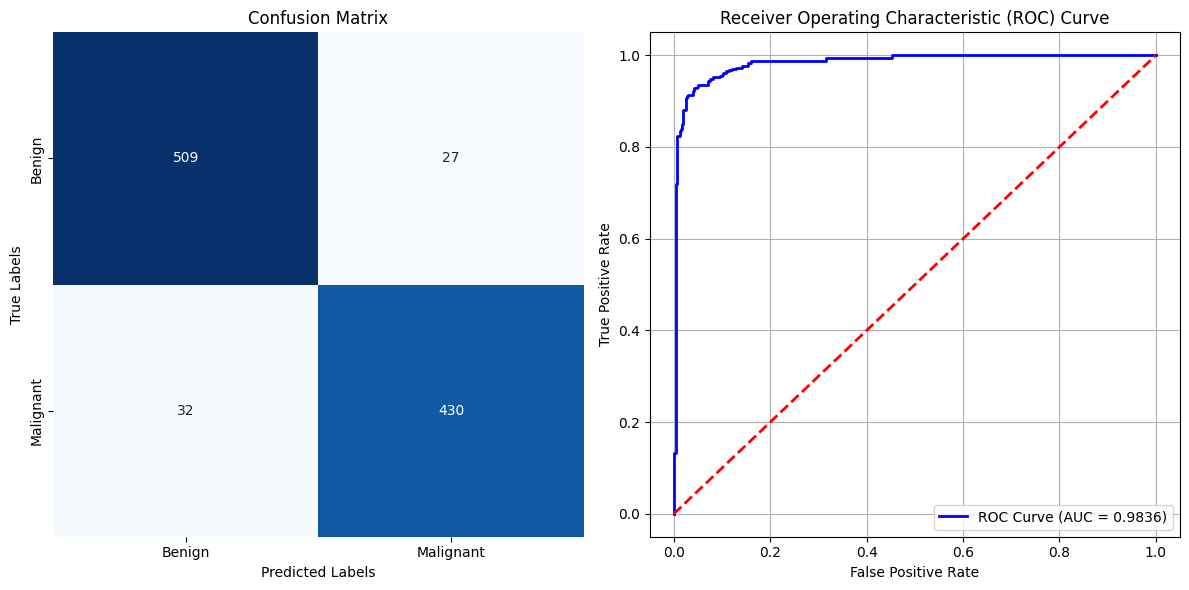

In [74]:
final_metrics = evaluate_model(model, dataloaders['val'], criterion, device)

It's getting better but there is still room for improvement

In [76]:
additional_epochs2 = 39 # So it sum up to 64 (Nerd Stuff), moreover if I sleep 8h the Notebook should not die hopefully
train_model(
    model=model,
    dataloaders=dataloaders,
    criterion=criterion,
    optimizer=optimizer,
    scheduler=scheduler,
    scaler=scaler,
    num_epochs=15 + additional_epochs + additional_epochs2,
    checkpoint_path='checkpoints/model_checkpoint.pth',
    patience=5
)

🔄 Resuming training from checkpoint...


<ipython-input-52-a3c1a4472080>:33: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(checkpoint_path)


✅ Resumed from epoch 25

🚀 **Epoch 26/64**
🔹 Batch 10/125 | Batch Loss: 0.3787
🔹 Batch 20/125 | Batch Loss: 0.0509
🔹 Batch 30/125 | Batch Loss: 0.1575
🔹 Batch 40/125 | Batch Loss: 0.1244
🔹 Batch 50/125 | Batch Loss: 0.2639
🔹 Batch 60/125 | Batch Loss: 0.1068
🔹 Batch 70/125 | Batch Loss: 0.1400
🔹 Batch 80/125 | Batch Loss: 0.0673
🔹 Batch 90/125 | Batch Loss: 0.0934
🔹 Batch 100/125 | Batch Loss: 0.0754
🔹 Batch 110/125 | Batch Loss: 0.1226
🔹 Batch 120/125 | Batch Loss: 0.0868
✅ Epoch 26 | Train Loss: 0.1041 | Val Loss: 0.1685 | Val Acc: 0.9419 | Val AUC: 0.9847
💾 Checkpoint saved successfully.

🚀 **Epoch 27/64**
🔹 Batch 10/125 | Batch Loss: 0.0305
🔹 Batch 20/125 | Batch Loss: 0.0920
🔹 Batch 30/125 | Batch Loss: 0.0475
🔹 Batch 40/125 | Batch Loss: 0.0383
🔹 Batch 50/125 | Batch Loss: 0.1223
🔹 Batch 60/125 | Batch Loss: 0.0697
🔹 Batch 70/125 | Batch Loss: 0.2089
🔹 Batch 80/125 | Batch Loss: 0.1037
🔹 Batch 90/125 | Batch Loss: 0.0372
🔹 Batch 100/125 | Batch Loss: 0.2104
🔹 Batch 110/125 | Batc

([0.10411875087022782,
  0.09838305896520615,
  0.1339060229063034,
  0.13071372191607952,
  0.1095611815750599,
  0.10442978139221669],
 [0.16851810994558036,
  0.2510369772207923,
  0.39843664004001766,
  0.21138232399243861,
  0.2161917950725183,
  0.24423644674243405],
 [0.9418837675350702,
  0.906813627254509,
  0.8517034068136272,
  0.9308617234468938,
  0.9218436873747495,
  0.9108216432865731],
 [0.9847232990889707,
  0.9767275634812949,
  0.9544162305356335,
  0.9792736802997997,
  0.9762126865671642,
  0.9764650772113459])

45 minutes of more training more or less, I didn't expect Erly stopping to be triggered this soon

In [77]:
# Extend Train Losses
train_losses.extend([
    0.10411875087022782,
    0.09838305896520615,
    0.1339060229063034,
    0.13071372191607952,
    0.1095611815750599,
    0.10442978139221669
])

# Extend Validation Losses
val_losses.extend([
    0.16851810994558036,
    0.2510369772207923,
    0.39843664004001766,
    0.21138232399243861,
    0.2161917950725183,
    0.24423644674243405
])

# Extend Validation Accuracies
val_accuracies.extend([
    0.9418837675350702,
    0.906813627254509,
    0.8517034068136272,
    0.9308617234468938,
    0.9218436873747495,
    0.9108216432865731
])

# Extend Validation ROC-AUCs
val_roc_aucs.extend([
    0.9847232990889707,
    0.9767275634812949,
    0.9544162305356335,
    0.9792736802997997,
    0.9762126865671642,
    0.9764650772113459
])


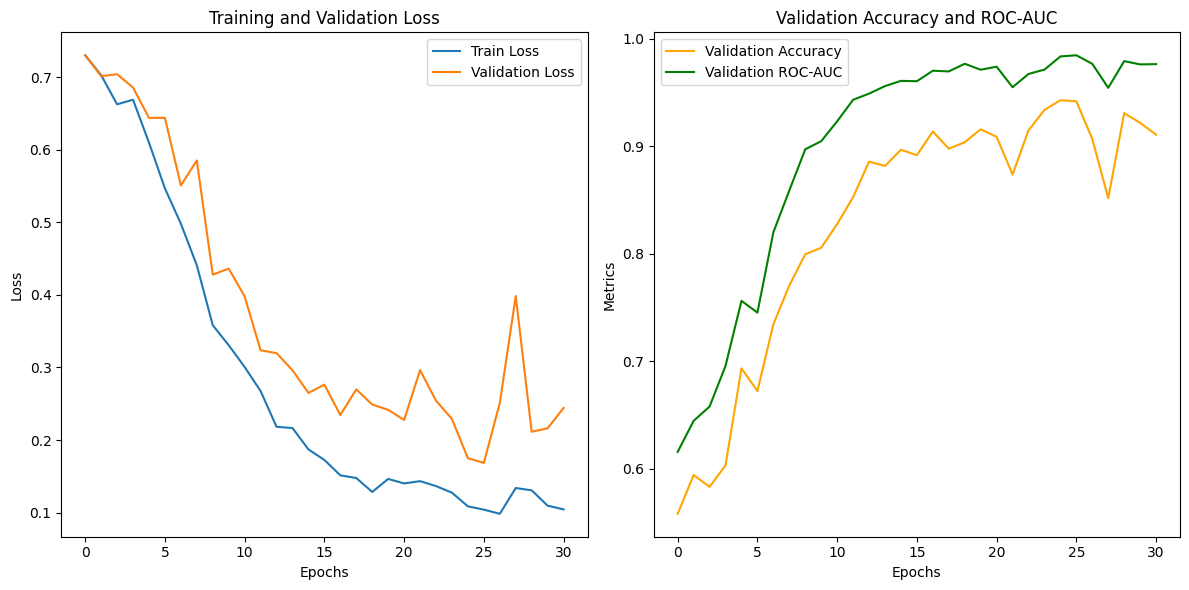

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot Training and Validation Losses
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot Validation Accuracy and ROC-AUC
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy', color='orange')
plt.plot(val_roc_aucs, label='Validation ROC-AUC', color='green')
plt.xlabel('Epochs')
plt.ylabel('Metrics')
plt.title('Validation Accuracy and ROC-AUC')
plt.legend()

plt.tight_layout()
plt.show()


✅ Final Validation Loss: 0.2445
✅ Accuracy: 0.9108
✅ ROC-AUC: 0.9765

📊 Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.86      0.91       536
   Malignant       0.86      0.97      0.91       462

    accuracy                           0.91       998
   macro avg       0.91      0.91      0.91       998
weighted avg       0.92      0.91      0.91       998



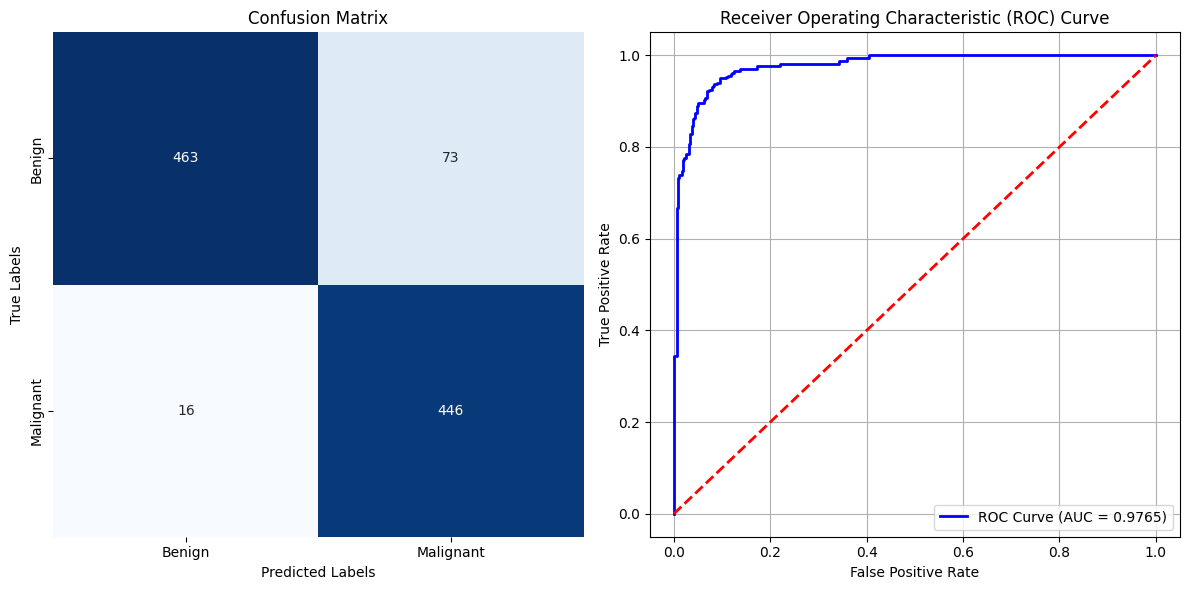

In [79]:
final_metrics = evaluate_model(model, dataloaders['val'], criterion, device)

Result are good, CustomCNN managed to focus more on minimize the False Positive, it's important since our focus is there ofc, Recall score is quite high. I am really happy with this results

In [80]:
# Save the entire model
torch.save(model.state_dict(), 'final_model.pth')

# Optional: Save with additional metadata (e.g., optimizer, scheduler, scaler)
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'scheduler_state_dict': scheduler.state_dict(),
    'scaler_state_dict': scaler.state_dict(),
    'train_losses': train_losses,
    'val_losses': val_losses,
    'val_accuracies': val_accuracies,
    'val_roc_aucs': val_roc_aucs
}, 'final_model_with_metadata.pth')


In [83]:
# Download model
display(FileLink('final_model.pth'))
display(FileLink('final_model_with_metadata.pth'))
# As before, this is done cause Kaggle directory got quite buggy with the amount of data we have

/kaggle/working/final_model.pth

/kaggle/working/final_model_with_metadata.pth

In [88]:
import torch.nn as nn

# Extract intermediate layers from the trained model
intermediate_model = nn.Sequential(
    model.initial_conv,
    model.initial_bn,
    model.initial_pool,
    model.layer1,
    model.layer2,
    model.layer3,
    model.layer4,
    nn.AdaptiveAvgPool2d(1)  # Ensures consistent output shape (batch_size, channels, 1, 1)
).to(device)

# Put the intermediate model in evaluation mode
intermediate_model.eval()



Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (3): Sequential(
    (0): ResidualBlock(
      (conv1): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (bn2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (se): SEBlock(
        (fc1): Linear(in_features=128, out_features=8, bias=True)
        (fc2): Linear(in_features=8, out_features=128, bias=True)
      )
      (skip): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1))
      (bn_skip): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): ResidualBloc

In [103]:
import torch
from torch.utils.data import Dataset
import numpy as np

class Custom3ChannelDataset(Dataset):
    def __init__(self, file_paths, labels, transform=None):
        self.file_paths = file_paths
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.file_paths)

    def __getitem__(self, idx):
        img_path = self.file_paths[idx]
        img = np.load(img_path)  # Load image data from path
        label = self.labels[idx]
        
        # Ensure correct shape (C, H, W)
        if img.shape[-1] == 3:  # If channels are last
            img = np.transpose(img, (2, 0, 1))
        
        # Ensure PyTorch Tensor
        img = torch.tensor(img, dtype=torch.float32)
        
        if self.transform:
            img = self.transform(img)
        
        return img, label, img_path  # Return image, label, and path

# we need to change this function to allow us to store file path that will serve us as primary key, if we need to retrieve information from the metadatas

In [104]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Ensure all images are resized to 224x224
    transforms.Normalize(mean=[0.00237972, 0.0023751,  0.00174674],
                         std=[0.00088792, 0.00102896, 0.00067923])
])

In [105]:
train_dataset = Custom3ChannelDataset(train_files, train_labels, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = Custom3ChannelDataset(test_files, test_labels, transform=transform)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

dataloaders = {'train': train_loader, 'val': val_loader}

# We need to redo this to adapt it to our new funct

In [110]:
intermediate_features = []
intermediate_labels = []
image_keys = []

# Feature Extraction Loop 
with torch.no_grad():
    for batch_idx, (inputs, labels, paths) in enumerate(dataloaders['train']):
        
        if (batch_idx + 1) % 10 == 0:
            print(f"\n🛠️ Processing Batch {batch_idx + 1}/{len(dataloaders['train'])}")
            print(f"   📊 Inputs Shape: {inputs.shape}")
            print(f"   🏷️ Labels Shape: {labels.shape}")
            print(f"   🗂️ First Path in Batch: {paths[0] if paths else 'No paths available'}")
        
        inputs = inputs.to(device) # correct device
        outputs = intermediate_model(inputs) # Pass inputs through the intermediate model
        
        if (batch_idx + 1) % 10 == 0:
            print(f"   🔄 Outputs Shape (Before Flattening): {outputs.shape}")

        # Flatten outputs for feature extraction
        outputs = outputs.view(outputs.size(0), -1)
        
        if (batch_idx + 1) % 10 == 0:
            print(f"   🔄 Outputs Shape (After Flattening): {outputs.shape}")
        
        intermediate_features.extend(outputs.cpu().numpy())
        intermediate_labels.extend(labels.cpu().numpy())
        image_keys.extend(paths)  # Store file paths
        
        if (batch_idx + 1) % 10 == 0:
            print(f"✅ Processed {batch_idx + 1} batches so far...")

# Final Debug
print("\n🎯 Feature extraction completed successfully!")
print(f"Total Features Collected: {len(intermediate_features)}")
print(f"Total Labels Collected: {len(intermediate_labels)}")
print(f"Total Image Keys Collected: {len(image_keys)}")



🛠️ Processing Batch 10/125
   📊 Inputs Shape: torch.Size([32, 3, 224, 224])
   🏷️ Labels Shape: torch.Size([32])
   🗂️ First Path in Batch: /kaggle/working/strategy1_dataset/benign/augmented_strategy1_3334_0.npy
   🔄 Outputs Shape (Before Flattening): torch.Size([32, 1024, 1, 1])
   🔄 Outputs Shape (After Flattening): torch.Size([32, 1024])
✅ Processed 10 batches so far...

🛠️ Processing Batch 20/125
   📊 Inputs Shape: torch.Size([32, 3, 224, 224])
   🏷️ Labels Shape: torch.Size([32])
   🗂️ First Path in Batch: /kaggle/working/strategy1_dataset/malignant/augmented_strategy1_148_1.npy
   🔄 Outputs Shape (Before Flattening): torch.Size([32, 1024, 1, 1])
   🔄 Outputs Shape (After Flattening): torch.Size([32, 1024])
✅ Processed 20 batches so far...

🛠️ Processing Batch 30/125
   📊 Inputs Shape: torch.Size([32, 3, 224, 224])
   🏷️ Labels Shape: torch.Size([32])
   🗂️ First Path in Batch: /kaggle/working/strategy1_dataset/malignant/augmented_strategy1_1105_1.npy
   🔄 Outputs Shape (Before F

In [111]:
import pandas as pd

# Convert lists to DataFrame
intermediate_features_df = pd.DataFrame(intermediate_features)
intermediate_labels_df = pd.DataFrame(intermediate_labels, columns=['label'])
image_keys_df = pd.DataFrame(image_keys, columns=['image_key'])  # File paths as keys

# Combine into one DataFrame
final_intermediate_df = pd.concat([image_keys_df, intermediate_features_df, intermediate_labels_df], axis=1)

final_intermediate_df.head()

,image_key,0,1,2,3,4,5,6,7,8,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,label
0,/kaggle/working/strategy1_dataset/malignant/au...,10.926509,5.081696,2.549881,-0.227983,-0.245214,-0.193460,-0.233649,-0.055588,2.686719,...,9.174299,12.243621,-0.254237,-0.159785,-0.028201,1.126101,7.893537,7.990825,2.650643,1
1,/kaggle/working/strategy1_dataset/benign/augme...,9.356888,4.537387,2.049225,-0.231737,-0.248936,-0.226439,-0.217086,-0.114940,1.662184,...,5.355133,8.956690,-0.246496,-0.196517,-0.065037,1.175734,4.970422,5.171543,1.778020,0
2,/kaggle/working/strategy1_dataset/malignant/au...,13.865281,6.306925,2.765895,-0.220777,-0.239619,-0.151364,-0.240960,-0.030991,3.443389,...,12.593209,15.843244,-0.252440,-0.125763,0.015552,1.581511,10.569875,10.936390,1.776106,1
3,/kaggle/working/strategy1_dataset/benign/augme...,6.941268,3.338237,1.830759,-0.215277,-0.237149,-0.193210,-0.216317,-0.174567,1.199437,...,3.420130,6.861187,-0.229517,-0.174082,-0.073545,0.208587,3.315392,3.514314,2.507322,0
4,/kaggle/working/strategy1_dataset/malignant/au...,6.684911,3.422572,1.913208,-0.096386,-0.197898,-0.077086,-0.153152,-0.084801,1.444660,...,3.845285,6.787797,-0.232205,0.057128,-0.059853,0.493418,3.438820,3.565526,2.255599,1


In [112]:
final_intermediate_df.shape

(3986, 1026)

Perfect!

In [113]:
# Save to CSV
final_intermediate_df.to_csv('intermediate_features_with_keys.csv', index=False)
print("✅ Intermediate features saved to 'intermediate_features_with_keys.csv'")

✅ Intermediate features saved to 'intermediate_features_with_keys.csv'


In [114]:
display(FileLink('intermediate_features_with_keys.csv'))

/kaggle/working/intermediate_features_with_keys.csv

In [133]:
import cupy as cp

def check_memory():
    memory_pool = cp.get_default_memory_pool()
    total_memory = cp.cuda.Device(0).mem_info[0]  # Total memory available
    used_memory = memory_pool.used_bytes()       # Memory allocated by the pool
    free_memory = total_memory - used_memory
    print(f"GPU Memory - Total: {total_memory / (1024**3):.2f} GB, Used: {used_memory / (1024**3):.2f} GB, Free: {free_memory / (1024**3):.2f} GB")

check_memory()
# Gpu memory was 0, after clearing it I waas able to restart training the model

GPU Memory - Total: 0.06 GB, Used: 0.00 GB, Free: 0.06 GB


In [134]:
import torch

torch.cuda.empty_cache()
torch.cuda.reset_peak_memory_stats()
print("✅ GPU Cache Cleared and Memory Stats Reset")


✅ GPU Cache Cleared and Memory Stats Reset


In [135]:
check_memory()

GPU Memory - Total: 10.90 GB, Used: 0.00 GB, Free: 10.90 GB


In [ ]:
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
import pandas as pd

# Load intermediate features and labels into DataFrame
features_df = pd.DataFrame(intermediate_features)
labels_df = pd.Series(intermediate_labels, name='label')

# Split dataset into Train and Validation sets
X_train, X_val, y_train, y_val = train_test_split(
    features_df, labels_df, test_size=0.2, random_state=42, stratify=labels_df
)


In [136]:
# Objective Function with Updated Parameter Suggestion Methods
def objective(trial):
    # Hyperparameter Tuning Space with Updated Suggestion Methods
    params = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "verbosity": 0,
        "booster": "gbtree",
        "max_depth": trial.suggest_int("max_depth", 3, 10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "gamma": trial.suggest_float("gamma", 1e-8, 1.0, log=True),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "lambda": trial.suggest_float("lambda", 1e-8, 10.0, log=True),
        "alpha": trial.suggest_float("alpha", 1e-8, 10.0, log=True),
        "early_stopping_rounds": 50  # Moved from `fit` to params
    }

    # Train XGBoost Model
    model = xgb.XGBClassifier(**params, use_label_encoder=False, tree_method='gpu_hist', )
    model.fit(
        X_train, y_train,
        eval_set=[(X_val, y_val)],
        verbose=False
    )
    
    # Validation Prediction
    preds = model.predict(X_val)
    
    # Calculate Recall for Malignant Class
    recall = recall_score(y_val, preds, pos_label=1)
    return recall

In [138]:
# Optuna Study with TPE Sampler
study = optuna.create_study(
    direction="maximize",  # Maximize Recall
    sampler=optuna.samplers.TPESampler(seed=42)
)
study.optimize(objective, n_trials=50)

# Best Hyperparameters
print("🔑 Best Hyperparameters:", study.best_params)
print("📈 Best Recall on Malignant Class:", study.best_value)


[I 2024-12-24 02:58:12,491] A new study created in memory with name: no-name-20723574-02d4-4632-87e8-843279b07d11
[I 2024-12-24 02:58:15,710] Trial 0 finished with value: 0.9405405405405406 and parameters: {'max_depth': 5, 'learning_rate': 0.2536999076681772, 'n_estimators': 759, 'min_child_weight': 6, 'gamma': 1.77071686435378e-07, 'subsample': 0.5779972601681014, 'colsample_bytree': 0.5290418060840998, 'lambda': 0.6245760287469893, 'alpha': 0.002570603566117598}. Best is trial 0 with value: 0.9405405405405406.
[I 2024-12-24 02:58:32,263] Trial 1 finished with value: 0.9297297297297298 and parameters: {'max_depth': 8, 'learning_rate': 0.010725209743171997, 'n_estimators': 973, 'min_child_weight': 9, 'gamma': 4.997040685255803e-07, 'subsample': 0.5909124836035503, 'colsample_bytree': 0.5917022549267169, 'lambda': 5.472429642032198e-06, 'alpha': 0.00052821153945323}. Best is trial 0 with value: 0.9405405405405406.
[I 2024-12-24 02:58:43,388] Trial 2 finished with value: 0.93513513513513

🔑 Best Hyperparameters: {'max_depth': 6, 'learning_rate': 0.05081348422738255, 'n_estimators': 788, 'min_child_weight': 3, 'gamma': 1.8491259797839793e-05, 'subsample': 0.5035688138117864, 'colsample_bytree': 0.7712886602730182, 'lambda': 0.006093812542810928, 'alpha': 0.002306487211371581}
📈 Best Recall on Malignant Class: 0.9513513513513514


In [140]:
# Train final model with best parameters
best_params = study.best_params
final_model = xgb.XGBClassifier(**best_params, use_label_encoder=False, tree_method='gpu_hist',)

final_model.fit(
    X_train, y_train,
    eval_set=[(X_val, y_val)],
    early_stopping_rounds=50,
    verbose=True
)

# Evaluate on Validation Set
final_preds = final_model.predict(X_val)
final_recall = recall_score(y_val, final_preds, pos_label=1)

print("✅ Final XGBoost Model Recall on Malignant Class:", final_recall)


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-logloss:0.68090
[1]	validation_0-logloss:0.66943
[2]	validation_0-logloss:0.65909
[3]	validation_0-logloss:0.64890


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:04:13] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[4]	validation_0-logloss:0.64084
[5]	validation_0-logloss:0.63316
[6]	validation_0-logloss:0.62531
[7]	validation_0-logloss:0.61735
[8]	validation_0-logloss:0.60882
[9]	validation_0-logloss:0.60168
[10]	validation_0-logloss:0.59590
[11]	validation_0-logloss:0.59033
[12]	validation_0-logloss:0.58438
[13]	validation_0-logloss:0.57887
[14]	validation_0-logloss:0.57312
[15]	validation_0-logloss:0.56672
[16]	validation_0-logloss:0.56092
[17]	validation_0-logloss:0.55313
[18]	validation_0-logloss:0.54747
[19]	validation_0-logloss:0.54171
[20]	validation_0-logloss:0.53726
[21]	validation_0-logloss:0.53087
[22]	validation_0-logloss:0.52756
[23]	validation_0-logloss:0.52218
[24]	validation_0-logloss:0.51708
[25]	validation_0-logloss:0.51217
[26]	validation_0-logloss:0.50775
[27]	validation_0-logloss:0.50447
[28]	validation_0-logloss:0.50011
[29]	validation_0-logloss:0.49681
[30]	validation_0-logloss:0.49287
[31]	validation_0-logloss:0.48811
[32]	validation_0-logloss:0.48431
[33]	validation_0-lo

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [03:04:24] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


✅ Accuracy Score: 0.9524


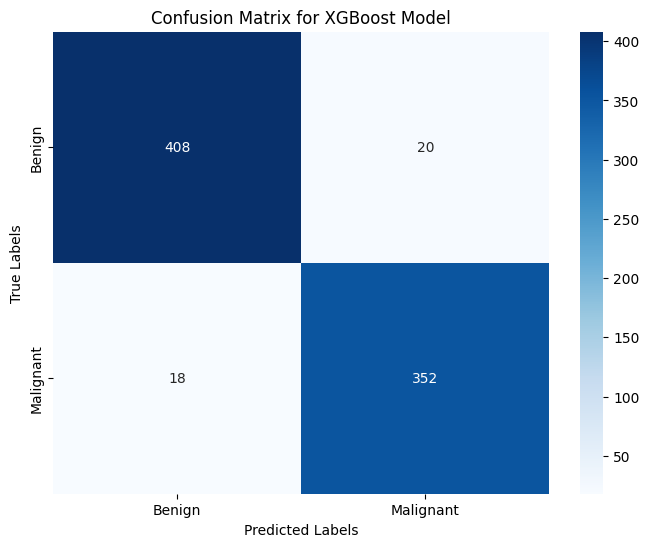

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# 📊 Predictions on Validation Data
y_pred = final_model.predict(X_val)

# ✅ Calculate Accuracy Score
accuracy = accuracy_score(y_val, y_pred)
print(f"✅ Accuracy Score: {accuracy:.4f}")

# 📉 Compute Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# 🎨 Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()


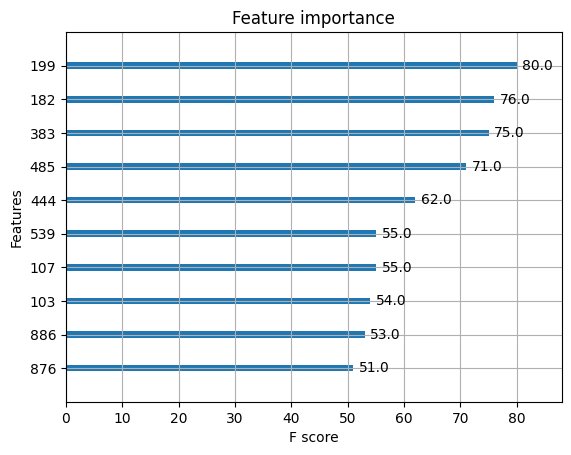

In [154]:
xgb.plot_importance(final_model, max_num_features=10)
plt.show()


In [141]:
import joblib

# Save the final model
joblib.dump(final_model, 'xgboost_malignant_recall_optimized.pkl')
print("💾 Model saved as 'xgboost_malignant_recall_optimized.pkl'")


💾 Model saved as 'xgboost_malignant_recall_optimized.pkl'


In [142]:
display(FileLink('xgboost_malignant_recall_optimized.pkl'))

/kaggle/working/xgboost_malignant_recall_optimized.pkl

In [150]:
check_memory()

GPU Memory - Total: 11.00 GB, Used: 0.00 GB, Free: 11.00 GB


In [ ]:
from catboost import CatBoostClassifier

# CatBoost Objective Function
def objective_catboost(trial):
    params = {
        "loss_function": "Logloss",
        "eval_metric": "Recall",
        "iterations": trial.suggest_int("iterations", 100, 1000),
        "task_type": "GPU",
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "depth": trial.suggest_int("depth", 4, 10),
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-8, 10.0, log=True),
        "random_strength": trial.suggest_float("random_strength", 0.0, 10.0),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 10.0),
        "border_count": trial.suggest_int("border_count", 32, 255),
        "grow_policy": trial.suggest_categorical("grow_policy", ["SymmetricTree", "Depthwise", "Lossguide"]),
        "verbose": 0,
        "random_seed": 42
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=False)
    
    preds = model.predict(X_val)
    recall = recall_score(y_val, preds, pos_label=1)
    return recall


In [153]:
# Optuna Study for CatBoost
study_catboost = optuna.create_study(
    direction="maximize",
    sampler=optuna.samplers.TPESampler(seed=42)
)
study_catboost.optimize(objective_catboost, n_trials=50)

# Best Parameters and Recall
print("🔑 Best CatBoost Hyperparameters:", study_catboost.best_params)
print("📈 Best CatBoost Recall on Malignant Class:", study_catboost.best_value)


[I 2024-12-24 03:08:17,141] A new study created in memory with name: no-name-8ac7d0e7-a5fb-4015-adff-3253a80396d7
[I 2024-12-24 03:08:34,502] Trial 0 finished with value: 0.9459459459459459 and parameters: {'iterations': 437, 'learning_rate': 0.2536999076681772, 'depth': 9, 'l2_leaf_reg': 0.0024430162614261413, 'random_strength': 1.5601864044243652, 'bagging_temperature': 1.5599452033620265, 'border_count': 45, 'grow_policy': 'SymmetricTree'}. Best is trial 0 with value: 0.9459459459459459.
[I 2024-12-24 03:08:42,962] Trial 1 finished with value: 0.9567567567567568 and parameters: {'iterations': 118, 'learning_rate': 0.2708160864249968, 'depth': 9, 'l2_leaf_reg': 8.148018307012941e-07, 'random_strength': 1.8182496720710062, 'bagging_temperature': 1.8340450985343382, 'border_count': 100, 'grow_policy': 'SymmetricTree'}. Best is trial 1 with value: 0.9567567567567568.
[I 2024-12-24 03:08:53,497] Trial 2 finished with value: 0.9324324324324325 and parameters: {'iterations': 651, 'learning

🔑 Best CatBoost Hyperparameters: {'iterations': 645, 'learning_rate': 0.11355251555923906, 'depth': 6, 'l2_leaf_reg': 4.061043008076542e-06, 'random_strength': 6.933487461036219, 'bagging_temperature': 8.544929262047072, 'border_count': 155, 'grow_policy': 'Depthwise'}
📈 Best CatBoost Recall on Malignant Class: 0.9621621621621622


In [156]:
# Train Final CatBoost Model
best_params_catboost = study_catboost.best_params
final_catboost = CatBoostClassifier(**best_params_catboost, random_seed=42)
final_catboost.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=True)

# Evaluate Final Model
final_preds_catboost = final_catboost.predict(X_val)
final_recall_catboost = recall_score(y_val, final_preds_catboost, pos_label=1)

print("✅ Final CatBoost Recall on Malignant Class:", final_recall_catboost)


0:	learn: 0.6867630	test: 0.6899033	best: 0.6899033 (0)	total: 189ms	remaining: 2m 1s
1:	learn: 0.6783010	test: 0.6854733	best: 0.6854733 (1)	total: 378ms	remaining: 2m 1s
2:	learn: 0.6689633	test: 0.6768182	best: 0.6768182 (2)	total: 577ms	remaining: 2m 3s
3:	learn: 0.6590443	test: 0.6730716	best: 0.6730716 (3)	total: 774ms	remaining: 2m 4s
4:	learn: 0.6509187	test: 0.6680655	best: 0.6680655 (4)	total: 985ms	remaining: 2m 6s
5:	learn: 0.6454791	test: 0.6633089	best: 0.6633089 (5)	total: 1.18s	remaining: 2m 5s
6:	learn: 0.6366600	test: 0.6560103	best: 0.6560103 (6)	total: 1.41s	remaining: 2m 8s
7:	learn: 0.6307477	test: 0.6537792	best: 0.6537792 (7)	total: 1.61s	remaining: 2m 7s
8:	learn: 0.6231217	test: 0.6482076	best: 0.6482076 (8)	total: 1.81s	remaining: 2m 8s
9:	learn: 0.6200207	test: 0.6457860	best: 0.6457860 (9)	total: 1.95s	remaining: 2m 4s
10:	learn: 0.6123806	test: 0.6397012	best: 0.6397012 (10)	total: 2.16s	remaining: 2m 4s
11:	learn: 0.6043901	test: 0.6320916	best: 0.6320916

✅ Accuracy Score: 0.9549


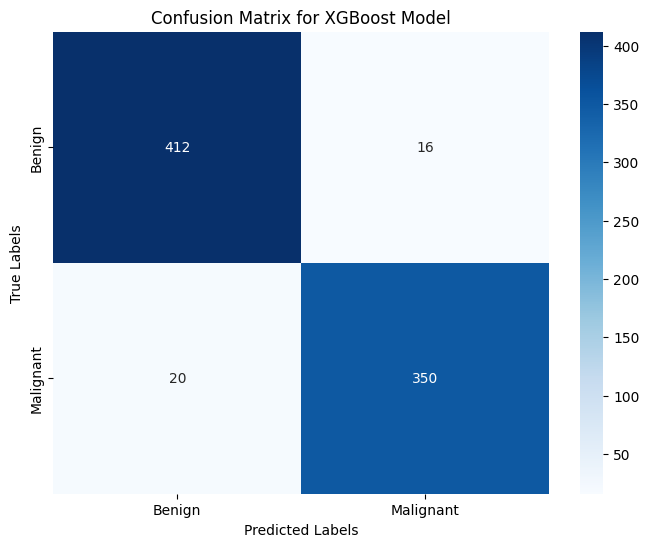

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# 📊 Predictions on Validation Data
y_pred = catboost_model.predict(X_val)

# ✅ Calculate Accuracy Score
accuracy = accuracy_score(y_val, y_pred)
print(f"✅ Accuracy Score: {accuracy:.4f}")

# 📉 Compute Confusion Matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# 🎨 Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for XGBoost Model')
plt.show()


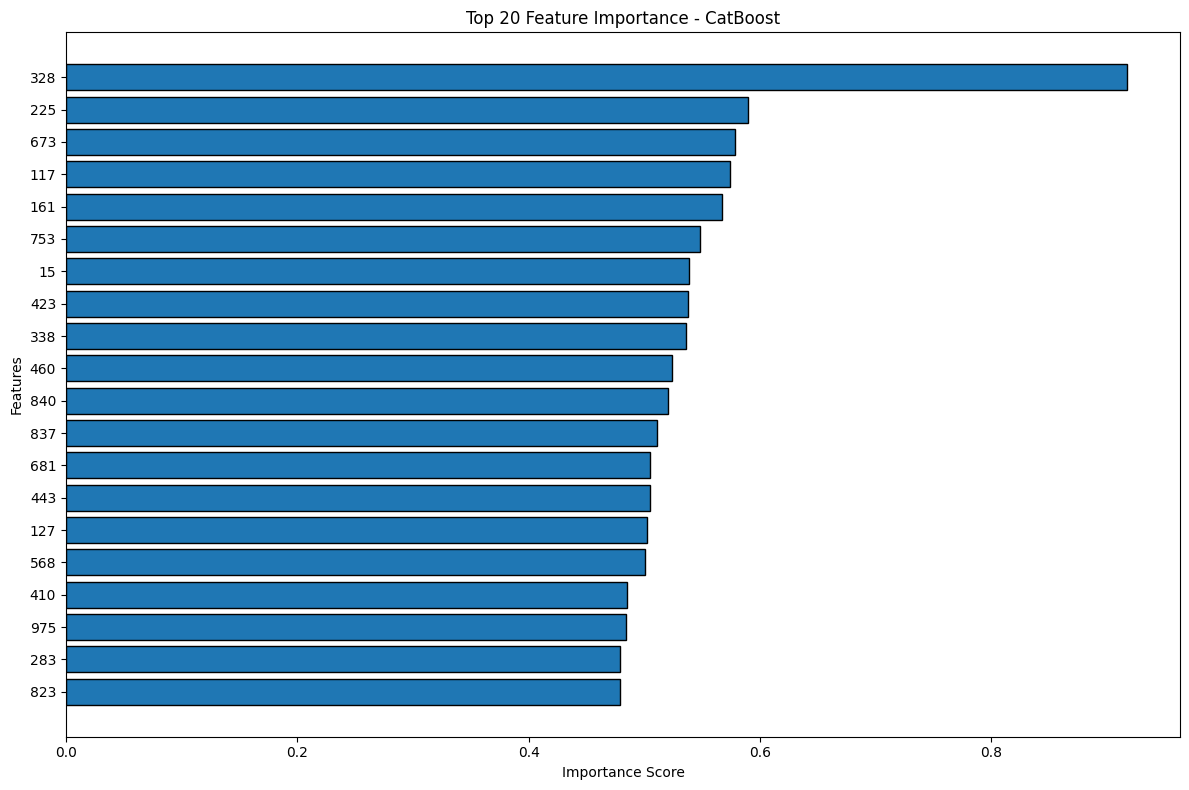

In [8]:
import matplotlib.pyplot as plt

# Extract feature importance from CatBoost model
catboost_importance = final_catboost.get_feature_importance()
feature_names = final_intermediate_df.columns[1:-1]  # Exclude image_key and label columns

catboost_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': catboost_importance
}).sort_values(by='Importance', ascending=False).head(20)  # Top 20 features

# Plot 
plt.figure(figsize=(12, 8))
plt.barh(catboost_importance_df['Feature'], catboost_importance_df['Importance'], edgecolor='black')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.title('Top 20 Feature Importance - CatBoost')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



In [161]:
import joblib

# Save the Final CatBoost Model
joblib.dump(final_catboost, 'catboost_malignant_recall_optimized.pkl')
print("💾 CatBoost Model saved as 'catboost_malignant_recall_optimized.pkl'")


💾 CatBoost Model saved as 'catboost_malignant_recall_optimized.pkl'


In [162]:
display(FileLink('catboost_malignant_recall_optimized.pkl'))

/kaggle/working/catboost_malignant_recall_optimized.pkl

In [7]:
import warnings
import logging

# Suppress Warnings
warnings.filterwarnings("ignore", category=UserWarning)
logging.getLogger("lightgbm").setLevel(logging.ERROR)


In [8]:
import lightgbm as lgb
from sklearn.metrics import recall_score
import optuna

# LightGBM Objective Function
def objective_lightgbm(trial):
    params = {
        "objective": "binary",
        "metric": "binary_logloss",
        "boosting_type": "gbdt",
        "device": "gpu",
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "max_depth": trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3, log=True),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-8, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-8, 10.0, log=True),
        'verbose': -1,  # Suppress all verbose output
        "random_state": 42
    }

    model = lgb.LGBMClassifier(**params, verbose_eval=False)
    model.fit(X_train, y_train, eval_set=[(X_val, y_val)])
    
    preds = model.predict(X_val)
    recall = recall_score(y_val, preds, pos_label=1)
    return recall


In [9]:
# Optuna Study for LightGBM
study_lightgbm = optuna.create_study(
    direction="maximize",
    sampler=optuna.samplers.TPESampler(seed=42)
)
study_lightgbm.optimize(objective_lightgbm, n_trials=50)

# Best Parameters and Recall
print("🔑 Best LightGBM Hyperparameters:", study_lightgbm.best_params)
print("📈 Best LightGBM Recall on Malignant Class:", study_lightgbm.best_value)


[I 2024-12-24 18:39:57,091] A new study created in memory with name: no-name-1b96a9a8-209b-4f29-9f18-601ea56f95f6
[I 2024-12-24 18:40:09,369] Trial 0 finished with value: 0.9324324324324325 and parameters: {'num_leaves': 97, 'max_depth': 15, 'learning_rate': 0.1205712628744377, 'n_estimators': 639, 'min_child_samples': 19, 'subsample': 0.5779972601681014, 'colsample_bytree': 0.5290418060840998, 'reg_alpha': 0.6245760287469893, 'reg_lambda': 0.002570603566117598}. Best is trial 0 with value: 0.9324324324324325.
[I 2024-12-24 18:40:16,071] Trial 1 finished with value: 0.9243243243243243 and parameters: {'num_leaves': 182, 'max_depth': 3, 'learning_rate': 0.2708160864249968, 'n_estimators': 850, 'min_child_samples': 25, 'subsample': 0.5909124836035503, 'colsample_bytree': 0.5917022549267169, 'reg_alpha': 5.472429642032198e-06, 'reg_lambda': 0.00052821153945323}. Best is trial 0 with value: 0.9324324324324325.
[I 2024-12-24 18:40:23,574] Trial 2 finished with value: 0.9297297297297298 and 

🔑 Best LightGBM Hyperparameters: {'num_leaves': 103, 'max_depth': 15, 'learning_rate': 0.08000664943361392, 'n_estimators': 417, 'min_child_samples': 97, 'subsample': 0.8432445184319162, 'colsample_bytree': 0.5589991830108106, 'reg_alpha': 0.12136767407808108, 'reg_lambda': 0.006022685401291616}
📈 Best LightGBM Recall on Malignant Class: 0.9486486486486486


In [11]:
# Train Final LightGBM Model
best_params_lightgbm = study_lightgbm.best_params
final_lightgbm = lgb.LGBMClassifier(**best_params_lightgbm, random_state=42)
final_lightgbm.fit(X_train, y_train, eval_set=[(X_val, y_val)])

# Evaluate Final Model
final_preds_lightgbm = final_lightgbm.predict(X_val)
final_recall_lightgbm = recall_score(y_val, final_preds_lightgbm, pos_label=1)

print("✅ Final LightGBM Recall on Malignant Class:", final_recall_lightgbm)


✅ Final LightGBM Recall on Malignant Class: 0.9486486486486486


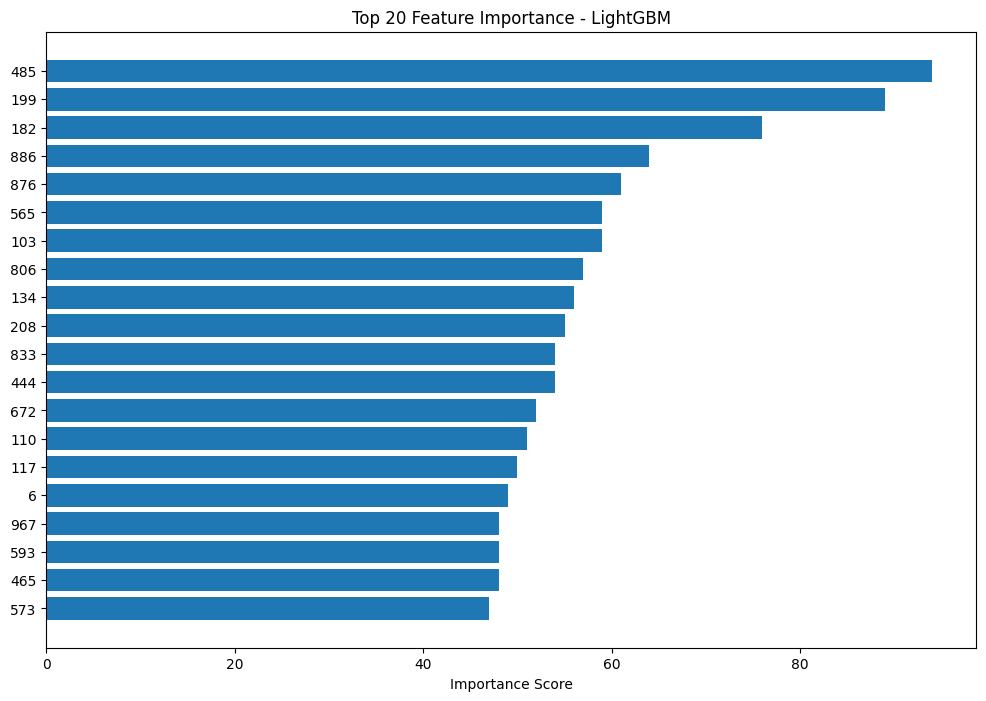

In [16]:
import matplotlib.pyplot as plt
# Extract feature importance from LightGBM model
lightgbm_importance = final_lightgbm.feature_importances_
feature_names = final_intermediate_df.columns[1:-1]  # Exclude image_key and label columns

# Create a DataFrame for feature importance
lightgbm_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': lightgbm_importance
}).sort_values(by='Importance', ascending=False).head(20)  # Top 20 features

# Plot LightGBM feature importance
plt.figure(figsize=(12, 8))
plt.barh(lightgbm_importance_df['Feature'], lightgbm_importance_df['Importance'])
plt.xlabel('Importance Score')
plt.title('Top 20 Feature Importance - LightGBM')
plt.gca().invert_yaxis()
plt.show()


In [17]:
import joblib

# Save the Final LightGBM Model
joblib.dump(final_lightgbm, 'lightgbm_malignant_recall_optimized.pkl')
print("💾 LightGBM Model saved as 'lightgbm_malignant_recall_optimized.pkl'")


💾 LightGBM Model saved as 'lightgbm_malignant_recall_optimized.pkl'


In [24]:

from IPython.display import FileLink
display(FileLink('lightgbm_malignant_recall_optimized.pkl'))


/kaggle/working/lightgbm_malignant_recall_optimized.pkl

In [1]:
import joblib

# Load Pre-trained Models
catboost_model = joblib.load('/kaggle/input/catboost-cbis-cancer/pytorch/default/1/catboost_malignant_recall_optimized.pkl')
xgb_model = joblib.load('/kaggle/input/xgboost-cbis-cancer/pytorch/default/1/xgboost_malignant_recall_optimized.pkl')
lightgbm_model = joblib.load('/kaggle/input/lightgbm-cbis-cancer/pytorch/default/1/lightgbm_malignant_recall_optimized.pkl')


In [26]:
# Ensure predictions are ready
xgb_preds = xgb_model.predict_proba(X_val)[:, 1]  
catboost_preds = catboost_model.predict_proba(X_val)[:, 1]
lightgbm_preds = lightgbm_model.predict_proba(X_val)[:, 1]

# True Labels
y_val_malignant = (y_val == 1).astype(int)

In [27]:
from sklearn.metrics import recall_score
import numpy as np

def weighted_ensemble_recall(weights, xgb_preds, catboost_preds, lightgbm_preds, y_true):
    """
    Calculate recall score on Malignant class using weighted ensemble predictions.
    """
    # Ensure weights sum to 1
    weights = np.array(weights) / np.sum(weights)
    
    # Weighted average of predictions
    final_preds = (
        weights[0] * xgb_preds +
        weights[1] * catboost_preds +
        weights[2] * lightgbm_preds
    )
    
    # Threshold predictions at 0.5
    final_binary_preds = (final_preds > 0.5).astype(int)
    
    # Calculate Recall for Malignant Class
    return recall_score(y_true, final_binary_preds, pos_label=1)


In [28]:
from sklearn.model_selection import ParameterGrid

weight_grid = list(ParameterGrid({
    'w1': np.arange(0.0, 1.05, 0.05),  # 0.0 to 1.0 with step 0.05
    'w2': np.arange(0.0, 1.05, 0.05),
    'w3': np.arange(0.0, 1.05, 0.05)
}))

# Track best score and weights
best_score = 0
best_weights = None

# Grid Search Loop
for weights in weight_grid:
    w1, w2, w3 = weights['w1'], weights['w2'], weights['w3']
    if round(w1 + w2 + w3, 2) == 1.0:  # Only valid combinations with slight tolerance
        score = weighted_ensemble_recall(
            [w1, w2, w3],
            xgb_preds,
            catboost_preds,
            lightgbm_preds,
            y_val_malignant
        )
        print(f"🔍 Weights: {w1:.2f}, {w2:.2f}, {w3:.2f} | Recall: {score:.4f}")
        if score > best_score:
            best_score = score
            best_weights = [w1, w2, w3]



🔍 Weights: 0.00, 0.00, 1.00 | Recall: 0.9486
🔍 Weights: 0.00, 0.05, 0.95 | Recall: 0.9486
🔍 Weights: 0.00, 0.10, 0.90 | Recall: 0.9432
🔍 Weights: 0.00, 0.15, 0.85 | Recall: 0.9405
🔍 Weights: 0.00, 0.20, 0.80 | Recall: 0.9405
🔍 Weights: 0.00, 0.25, 0.75 | Recall: 0.9405
🔍 Weights: 0.00, 0.30, 0.70 | Recall: 0.9405
🔍 Weights: 0.00, 0.35, 0.65 | Recall: 0.9405
🔍 Weights: 0.00, 0.40, 0.60 | Recall: 0.9405
🔍 Weights: 0.00, 0.45, 0.55 | Recall: 0.9405
🔍 Weights: 0.00, 0.50, 0.50 | Recall: 0.9405
🔍 Weights: 0.00, 0.55, 0.45 | Recall: 0.9405
🔍 Weights: 0.00, 0.60, 0.40 | Recall: 0.9432
🔍 Weights: 0.00, 0.65, 0.35 | Recall: 0.9432
🔍 Weights: 0.00, 0.70, 0.30 | Recall: 0.9432
🔍 Weights: 0.00, 0.75, 0.25 | Recall: 0.9432
🔍 Weights: 0.00, 0.80, 0.20 | Recall: 0.9486
🔍 Weights: 0.00, 0.85, 0.15 | Recall: 0.9486
🔍 Weights: 0.00, 0.90, 0.10 | Recall: 0.9432
🔍 Weights: 0.00, 0.95, 0.05 | Recall: 0.9432
🔍 Weights: 0.00, 1.00, 0.00 | Recall: 0.9459
🔍 Weights: 0.05, 0.00, 0.95 | Recall: 0.9486
🔍 Weights:

In [29]:
# Best Weights
print("✅ Best Weights for Ensemble:", best_weights)
print("📈 Best Recall on Malignant Class:", best_score)

# Final Ensemble Predictions
final_preds = (
    best_weights[0] * xgb_preds +
    best_weights[1] * catboost_preds +
    best_weights[2] * lightgbm_preds
)
final_binary_preds = (final_preds > 0.5).astype(int)

# Final Evaluation
final_recall = recall_score(y_val_malignant, final_binary_preds, pos_label=1)
print("🏆 Final Malignant Class Recall:", final_recall)


✅ Best Weights for Ensemble: [0.65, 0.1, 0.25]
📈 Best Recall on Malignant Class: 0.9567567567567568
🏆 Final Malignant Class Recall: 0.9567567567567568


In [32]:
from sklearn.metrics import recall_score, accuracy_score

final_accuracy = accuracy_score(y_val, final_binary_preds)
print("📊 Final Model Accuracy:", final_accuracy)


📊 Final Model Accuracy: 0.9548872180451128


<Figure size 800x600 with 0 Axes>

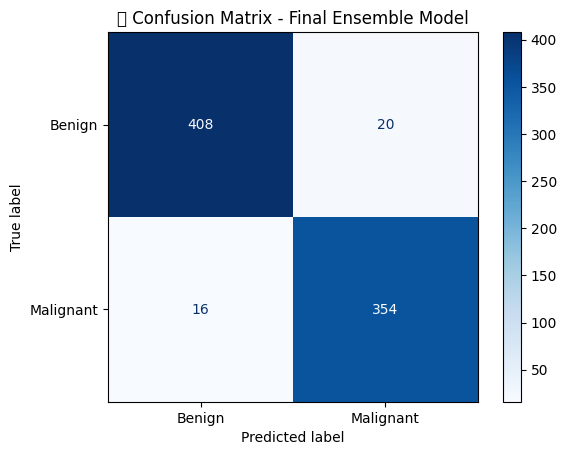

In [33]:
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_val, final_binary_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Benign', 'Malignant'])

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
disp.plot(cmap=plt.cm.Blues)
plt.title("🔍 Confusion Matrix - Final Ensemble Model")
plt.show()


In [30]:
import joblib

ensemble_metadata = {
    'weights': best_weights,
    'final_recall': final_recall
}

joblib.dump(ensemble_metadata, 'ensemble_weights_optimized.pkl')
print("💾 Ensemble weights and metadata saved successfully.")


💾 Ensemble weights and metadata saved successfully.


In [34]:
import joblib
import json

# Define the ensemble configuration
ensemble_config = {
    "weights": best_weights,
    "model_paths": {
        "xgboost_model": "xgb_model.pkl",
        "catboost_model": "catboost_model.cbm",
        "lightgbm_model": "lightgbm_model.txt"
    }
}

# Save each individual model
xgb_model.save_model(ensemble_config["model_paths"]["xgboost_model"])  # XGBoost Model
catboost_model.save_model(ensemble_config["model_paths"]["catboost_model"])  # CatBoost Model
lightgbm_model.booster_.save_model(ensemble_config["model_paths"]["lightgbm_model"])  # LightGBM Model

# Save ensemble configuration
with open("ensemble_config.json", "w") as f:
    json.dump(ensemble_config, f)

print("✅ Models and ensemble configuration saved successfully!")


✅ Models and ensemble configuration saved successfully!


In [35]:
display(FileLink('ensemble_config.json'))


/kaggle/working/ensemble_config.json

In [36]:
# Load Models
import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb

# Load ensemble configuration
with open("ensemble_config.json", "r") as f:
    ensemble_config = json.load(f)

# Load individual models
xgb_model = xgb.XGBClassifier()
xgb_model.load_model(ensemble_config["model_paths"]["xgboost_model"])

catboost_model = CatBoostClassifier()
catboost_model.load_model(ensemble_config["model_paths"]["catboost_model"])

lightgbm_model = lgb.Booster(model_file=ensemble_config["model_paths"]["lightgbm_model"])

# Ensemble Weights
weights = ensemble_config["weights"]

# Make Ensemble Predictions
xgb_preds = xgb_model.predict_proba(X_val)[:, 1]
catboost_preds = catboost_model.predict_proba(X_val)[:, 1]
lightgbm_preds = lightgbm_model.predict(X_val)

final_preds = (
    weights[0] * xgb_preds +
    weights[1] * catboost_preds +
    weights[2] * lightgbm_preds
)

# Binary Predictions
final_binary_preds = (final_preds > 0.5).astype(int)

print("✅ Ensemble predictions successfully loaded and applied!")


✅ Ensemble predictions successfully loaded and applied!
